# INTEGRATE Timing Analysis Example

This example demonstrates how to perform comprehensive timing analysis of the INTEGRATE workflow
using the built-in timing_compute() and timing_plot() functions. 

The timing analysis benchmarks four main components:
1. Prior model generation (layered geological models)
2. Forward modeling using GA-AEM electromagnetic simulation  
3. Rejection sampling for Bayesian inversion
4. Posterior statistics computation

Results are automatically saved and comprehensive plots are generated showing:
- Performance scaling with dataset size and processor count
- Speedup analysis and parallel efficiency
- Comparisons with traditional least squares and MCMC methods
- Component-wise timing breakdowns

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
import time

# Check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


## Quick Timing Test

This example runs a quick timing test with a small subset of dataset sizes 
and processor counts to demonstrate the timing functions.

In [3]:
print("# Running Quick Timing Test")
print("="*50)

# Define test parameters - small arrays for quick demonstration
N_arr_quick = [100, 1000, 10000]  # Small dataset sizes for quick test
Nproc_arr_quick = [1, 2, 4, 8]     # Limited processor counts

# Run timing computation
timing_file = ig.timing_compute(N_arr=N_arr_quick, Nproc_arr=Nproc_arr_quick)

print(f"\nTiming results saved to: {timing_file}")

# Running Quick Timing Test
Notebook detected. Parallel processing is OK
# TIMING TEST
Hostname (system): d52534 (Linux) 
Number of processors: 24
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex
Testing on 3 data sets of size(s): [100, 1000, 10000]
Testing on 4 sets of core(s): [1, 2, 4, 8]
Writing results to timing_d52534-Linux-24core_Nproc4_N3.npz 
TIMING: N=100, Ncpu=1, Ncpu_min=0


prior_layered:   0%|                                                                          | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                              | 0/100 [00:00<?, ?it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▌                       | 66/100 [00:01<00:00, 65.33it/s]

prior_data_gaaem: Time=  1.8s/100 soundings. 17.9ms/sounding, 55.9it/s


Rejection Sampling:   0%|                                                                   | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:  10%|█████                                                | 1124/11693 [00:00<00:00, 11232.51it/s]

Rejection Sampling:  19%|██████████▏                                          | 2259/11693 [00:00<00:00, 11298.43it/s]

Rejection Sampling:  29%|███████████████▎                                     | 3392/11693 [00:00<00:00, 11311.13it/s]

Rejection Sampling:  39%|████████████████████▌                                | 4525/11693 [00:00<00:00, 11316.90it/s]

Rejection Sampling:  48%|█████████████████████████▋                           | 5663/11693 [00:00<00:00, 11337.24it/s]

Rejection Sampling:  58%|██████████████████████████████▊                      | 6804/11693 [00:00<00:00, 11359.72it/s]

Rejection Sampling:  68%|███████████████████████████████████▉                 | 7940/11693 [00:00<00:00, 11351.89it/s]

Rejection Sampling:  78%|█████████████████████████████████████████▏           | 9076/11693 [00:00<00:00, 11263.37it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████▎      | 10203/11693 [00:00<00:00, 11260.41it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████▍ | 11330/11693 [00:01<00:00, 11253.03it/s]

integrate_rejection: Time=  1.0s/11693 soundings,  0.1ms/sounding, 11142.9it/s. T_av=1910.3, EV_av=-643.7


TIMING: N=1000, Ncpu=1, Ncpu_min=0


prior_layered:   0%|                                                                         | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                             | 0/1000 [00:00<?, ?it/s]

gatdaem1d:   6%|████▎                                                               | 63/1000 [00:01<00:15, 62.34it/s]

gatdaem1d:  13%|████████▌                                                          | 127/1000 [00:02<00:13, 62.80it/s]

gatdaem1d:  19%|████████████▊                                                      | 192/1000 [00:03<00:12, 63.39it/s]

gatdaem1d:  26%|█████████████████▏                                                 | 256/1000 [00:04<00:11, 63.26it/s]

gatdaem1d:  32%|█████████████████████▌                                             | 322/1000 [00:05<00:10, 64.00it/s]

gatdaem1d:  39%|█████████████████████████▉                                         | 387/1000 [00:06<00:09, 63.64it/s]

gatdaem1d:  46%|██████████████████████████████▍                                    | 455/1000 [00:07<00:08, 64.74it/s]

gatdaem1d:  52%|██████████████████████████████████▉                                | 521/1000 [00:08<00:07, 64.90it/s]

gatdaem1d:  59%|███████████████████████████████████████▎                           | 586/1000 [00:09<00:06, 64.80it/s]

gatdaem1d:  66%|███████████████████████████████████████████▉                       | 655/1000 [00:10<00:05, 65.89it/s]

gatdaem1d:  72%|████████████████████████████████████████████████▌                  | 724/1000 [00:11<00:04, 66.60it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████▉              | 791/1000 [00:12<00:03, 66.49it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████▍         | 858/1000 [00:13<00:02, 66.58it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████     | 926/1000 [00:14<00:01, 67.00it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████▌| 994/1000 [00:15<00:00, 67.28it/s]

prior_data_gaaem: Time= 15.5s/1000 soundings. 15.5ms/sounding, 64.4it/s


Rejection Sampling:   0%|                                                                   | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:   4%|██▍                                                    | 517/11693 [00:00<00:02, 5164.54it/s]

Rejection Sampling:   9%|████▊                                                 | 1041/11693 [00:00<00:02, 5205.85it/s]

Rejection Sampling:  13%|███████▏                                              | 1566/11693 [00:00<00:01, 5221.50it/s]

Rejection Sampling:  18%|█████████▋                                            | 2092/11693 [00:00<00:01, 5234.71it/s]

Rejection Sampling:  22%|████████████                                          | 2616/11693 [00:00<00:01, 5210.68it/s]

Rejection Sampling:  27%|██████████████▍                                       | 3138/11693 [00:00<00:01, 5137.15it/s]

Rejection Sampling:  31%|████████████████▉                                     | 3659/11693 [00:00<00:01, 5158.59it/s]

Rejection Sampling:  36%|███████████████████▎                                  | 4176/11693 [00:00<00:01, 5097.93it/s]

Rejection Sampling:  40%|█████████████████████▋                                | 4688/11693 [00:00<00:01, 5103.06it/s]

Rejection Sampling:  45%|████████████████████████                              | 5207/11693 [00:01<00:01, 5127.47it/s]

Rejection Sampling:  49%|██████████████████████████▍                           | 5720/11693 [00:01<00:01, 5068.37it/s]

Rejection Sampling:  53%|████████████████████████████▊                         | 6228/11693 [00:01<00:01, 5029.00it/s]

Rejection Sampling:  58%|███████████████████████████████                       | 6732/11693 [00:01<00:00, 4995.17it/s]

Rejection Sampling:  62%|█████████████████████████████████▍                    | 7232/11693 [00:01<00:00, 4984.50it/s]

Rejection Sampling:  66%|███████████████████████████████████▋                  | 7731/11693 [00:01<00:00, 4975.45it/s]

Rejection Sampling:  70%|██████████████████████████████████████                | 8240/11693 [00:01<00:00, 5008.51it/s]

Rejection Sampling:  75%|████████████████████████████████████████▍             | 8759/11693 [00:01<00:00, 5062.51it/s]

Rejection Sampling:  79%|██████████████████████████████████████████▊           | 9266/11693 [00:01<00:00, 5022.75it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████         | 9769/11693 [00:01<00:00, 5000.99it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████▋      | 10292/11693 [00:02<00:00, 5066.64it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████▉    | 10799/11693 [00:02<00:00, 5025.05it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████▏ | 11302/11693 [00:02<00:00, 4984.65it/s]

integrate_rejection: Time=  2.3s/11693 soundings,  0.2ms/sounding, 5027.7it/s. T_av=407.9, EV_av=-240.6


TIMING: N=10000, Ncpu=1, Ncpu_min=1


prior_layered:   0%|                                                                        | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                            | 0/10000 [00:00<?, ?it/s]

gatdaem1d:   1%|▍                                                                  | 68/10000 [00:01<02:28, 67.03it/s]

gatdaem1d:   1%|▉                                                                 | 137/10000 [00:02<02:25, 67.72it/s]

gatdaem1d:   2%|█▎                                                                | 206/10000 [00:03<02:23, 68.06it/s]

gatdaem1d:   3%|█▊                                                                | 275/10000 [00:04<02:22, 68.17it/s]

gatdaem1d:   3%|██▎                                                               | 344/10000 [00:05<02:21, 68.22it/s]

gatdaem1d:   4%|██▋                                                               | 413/10000 [00:06<02:20, 68.05it/s]

gatdaem1d:   5%|███▏                                                              | 482/10000 [00:07<02:20, 67.93it/s]

gatdaem1d:   6%|███▋                                                              | 550/10000 [00:08<02:20, 67.19it/s]

gatdaem1d:   6%|████                                                              | 618/10000 [00:09<02:19, 67.38it/s]

gatdaem1d:   7%|████▌                                                             | 686/10000 [00:10<02:19, 66.88it/s]

gatdaem1d:   8%|████▉                                                             | 754/10000 [00:11<02:17, 67.10it/s]

gatdaem1d:   8%|█████▍                                                            | 822/10000 [00:12<02:17, 66.69it/s]

gatdaem1d:   9%|█████▊                                                            | 889/10000 [00:13<02:16, 66.63it/s]

gatdaem1d:  10%|██████▎                                                           | 956/10000 [00:14<02:15, 66.69it/s]

gatdaem1d:  10%|██████▋                                                          | 1024/10000 [00:15<02:13, 67.05it/s]

gatdaem1d:  11%|███████                                                          | 1092/10000 [00:16<02:12, 67.11it/s]

gatdaem1d:  12%|███████▌                                                         | 1160/10000 [00:17<02:11, 67.06it/s]

gatdaem1d:  12%|███████▉                                                         | 1228/10000 [00:18<02:11, 66.83it/s]

gatdaem1d:  13%|████████▍                                                        | 1296/10000 [00:19<02:10, 66.92it/s]

gatdaem1d:  14%|████████▊                                                        | 1364/10000 [00:20<02:09, 66.93it/s]

gatdaem1d:  14%|█████████▎                                                       | 1433/10000 [00:21<02:07, 67.34it/s]

gatdaem1d:  15%|█████████▊                                                       | 1501/10000 [00:22<02:06, 67.37it/s]

gatdaem1d:  16%|██████████▏                                                      | 1569/10000 [00:23<02:05, 66.98it/s]

gatdaem1d:  16%|██████████▋                                                      | 1636/10000 [00:24<02:04, 66.96it/s]

gatdaem1d:  17%|███████████                                                      | 1703/10000 [00:25<02:03, 66.91it/s]

gatdaem1d:  18%|███████████▌                                                     | 1771/10000 [00:26<02:02, 67.18it/s]

gatdaem1d:  18%|███████████▉                                                     | 1839/10000 [00:27<02:01, 66.90it/s]

gatdaem1d:  19%|████████████▍                                                    | 1907/10000 [00:28<02:00, 66.98it/s]

gatdaem1d:  20%|████████████▊                                                    | 1976/10000 [00:29<01:59, 67.32it/s]

gatdaem1d:  20%|█████████████▎                                                   | 2044/10000 [00:30<01:58, 67.08it/s]

gatdaem1d:  21%|█████████████▋                                                   | 2112/10000 [00:31<01:57, 67.32it/s]

gatdaem1d:  22%|██████████████▏                                                  | 2180/10000 [00:32<01:56, 67.30it/s]

gatdaem1d:  22%|██████████████▌                                                  | 2248/10000 [00:33<01:54, 67.45it/s]

gatdaem1d:  23%|███████████████                                                  | 2316/10000 [00:34<01:54, 66.99it/s]

gatdaem1d:  24%|███████████████▍                                                 | 2383/10000 [00:35<01:54, 66.62it/s]

gatdaem1d:  24%|███████████████▉                                                 | 2450/10000 [00:36<01:53, 66.65it/s]

gatdaem1d:  25%|████████████████▎                                                | 2517/10000 [00:37<01:53, 66.17it/s]

gatdaem1d:  26%|████████████████▊                                                | 2584/10000 [00:38<01:51, 66.34it/s]

gatdaem1d:  27%|█████████████████▏                                               | 2651/10000 [00:39<01:50, 66.50it/s]

gatdaem1d:  27%|█████████████████▋                                               | 2718/10000 [00:40<01:49, 66.40it/s]

gatdaem1d:  28%|██████████████████                                               | 2786/10000 [00:41<01:48, 66.63it/s]

gatdaem1d:  29%|██████████████████▌                                              | 2854/10000 [00:42<01:46, 66.82it/s]

gatdaem1d:  29%|██████████████████▉                                              | 2922/10000 [00:43<01:45, 66.99it/s]

gatdaem1d:  30%|███████████████████▍                                             | 2989/10000 [00:44<01:45, 66.63it/s]

gatdaem1d:  31%|███████████████████▊                                             | 3057/10000 [00:45<01:43, 66.90it/s]

gatdaem1d:  31%|████████████████████▎                                            | 3124/10000 [00:46<01:43, 66.47it/s]

gatdaem1d:  32%|████████████████████▋                                            | 3191/10000 [00:47<01:42, 66.53it/s]

gatdaem1d:  33%|█████████████████████▏                                           | 3259/10000 [00:48<01:41, 66.67it/s]

gatdaem1d:  33%|█████████████████████▌                                           | 3326/10000 [00:49<01:40, 66.28it/s]

gatdaem1d:  34%|██████████████████████                                           | 3393/10000 [00:50<01:40, 66.01it/s]

gatdaem1d:  35%|██████████████████████▍                                          | 3460/10000 [00:51<01:38, 66.26it/s]

gatdaem1d:  35%|██████████████████████▉                                          | 3527/10000 [00:52<01:37, 66.18it/s]

gatdaem1d:  36%|███████████████████████▎                                         | 3595/10000 [00:53<01:36, 66.55it/s]

gatdaem1d:  37%|███████████████████████▊                                         | 3662/10000 [00:54<01:35, 66.60it/s]

gatdaem1d:  37%|████████████████████████▏                                        | 3730/10000 [00:55<01:33, 66.75it/s]

gatdaem1d:  38%|████████████████████████▋                                        | 3799/10000 [00:56<01:31, 67.41it/s]

gatdaem1d:  39%|█████████████████████████▏                                       | 3867/10000 [00:57<01:31, 67.12it/s]

gatdaem1d:  39%|█████████████████████████▌                                       | 3935/10000 [00:58<01:31, 66.56it/s]

gatdaem1d:  40%|██████████████████████████                                       | 4003/10000 [00:59<01:29, 66.84it/s]

gatdaem1d:  41%|██████████████████████████▍                                      | 4071/10000 [01:00<01:28, 67.14it/s]

gatdaem1d:  41%|██████████████████████████▉                                      | 4139/10000 [01:01<01:27, 67.30it/s]

gatdaem1d:  42%|███████████████████████████▎                                     | 4207/10000 [01:02<01:26, 67.29it/s]

gatdaem1d:  43%|███████████████████████████▊                                     | 4275/10000 [01:03<01:25, 67.12it/s]

gatdaem1d:  43%|████████████████████████████▏                                    | 4343/10000 [01:04<01:24, 66.74it/s]

gatdaem1d:  44%|████████████████████████████▋                                    | 4411/10000 [01:05<01:23, 67.01it/s]

gatdaem1d:  45%|█████████████████████████████                                    | 4479/10000 [01:06<01:22, 66.98it/s]

gatdaem1d:  45%|█████████████████████████████▌                                   | 4548/10000 [01:07<01:20, 67.39it/s]

gatdaem1d:  46%|██████████████████████████████                                   | 4616/10000 [01:08<01:19, 67.49it/s]

gatdaem1d:  47%|██████████████████████████████▍                                  | 4684/10000 [01:09<01:18, 67.34it/s]

gatdaem1d:  48%|██████████████████████████████▉                                  | 4752/10000 [01:10<01:18, 66.80it/s]

gatdaem1d:  48%|███████████████████████████████▎                                 | 4819/10000 [01:11<01:17, 66.63it/s]

gatdaem1d:  49%|███████████████████████████████▊                                 | 4887/10000 [01:12<01:16, 66.82it/s]

gatdaem1d:  50%|████████████████████████████████▏                                | 4955/10000 [01:14<01:15, 66.88it/s]

gatdaem1d:  50%|████████████████████████████████▋                                | 5023/10000 [01:15<01:14, 67.01it/s]

gatdaem1d:  51%|█████████████████████████████████                                | 5091/10000 [01:16<01:13, 66.66it/s]

gatdaem1d:  52%|█████████████████████████████████▌                               | 5159/10000 [01:17<01:12, 66.90it/s]

gatdaem1d:  52%|█████████████████████████████████▉                               | 5227/10000 [01:18<01:11, 67.00it/s]

gatdaem1d:  53%|██████████████████████████████████▍                              | 5295/10000 [01:19<01:10, 66.83it/s]

gatdaem1d:  54%|██████████████████████████████████▊                              | 5362/10000 [01:20<01:10, 66.21it/s]

gatdaem1d:  54%|███████████████████████████████████▎                             | 5429/10000 [01:21<01:08, 66.31it/s]

gatdaem1d:  55%|███████████████████████████████████▋                             | 5496/10000 [01:22<01:07, 66.36it/s]

gatdaem1d:  56%|████████████████████████████████████▏                            | 5563/10000 [01:23<01:06, 66.27it/s]

gatdaem1d:  56%|████████████████████████████████████▌                            | 5630/10000 [01:24<01:05, 66.30it/s]

gatdaem1d:  57%|█████████████████████████████████████                            | 5697/10000 [01:25<01:05, 66.18it/s]

gatdaem1d:  58%|█████████████████████████████████████▍                           | 5764/10000 [01:26<01:04, 66.04it/s]

gatdaem1d:  58%|█████████████████████████████████████▉                           | 5832/10000 [01:27<01:02, 66.36it/s]

gatdaem1d:  59%|██████████████████████████████████████▎                          | 5899/10000 [01:28<01:01, 66.34it/s]

gatdaem1d:  60%|██████████████████████████████████████▊                          | 5966/10000 [01:29<01:01, 66.03it/s]

gatdaem1d:  60%|███████████████████████████████████████▏                         | 6035/10000 [01:30<00:59, 66.60it/s]

gatdaem1d:  61%|███████████████████████████████████████▋                         | 6102/10000 [01:31<00:58, 66.45it/s]

gatdaem1d:  62%|████████████████████████████████████████                         | 6170/10000 [01:32<00:57, 66.75it/s]

gatdaem1d:  62%|████████████████████████████████████████▌                        | 6238/10000 [01:33<00:56, 66.99it/s]

gatdaem1d:  63%|████████████████████████████████████████▉                        | 6306/10000 [01:34<00:55, 67.12it/s]

gatdaem1d:  64%|█████████████████████████████████████████▍                       | 6374/10000 [01:35<00:53, 67.21it/s]

gatdaem1d:  64%|█████████████████████████████████████████▊                       | 6442/10000 [01:36<00:53, 66.78it/s]

gatdaem1d:  65%|██████████████████████████████████████████▎                      | 6509/10000 [01:37<00:52, 66.80it/s]

gatdaem1d:  66%|██████████████████████████████████████████▊                      | 6577/10000 [01:38<00:51, 66.92it/s]

gatdaem1d:  66%|███████████████████████████████████████████▏                     | 6644/10000 [01:39<00:50, 66.51it/s]

gatdaem1d:  67%|███████████████████████████████████████████▌                     | 6711/10000 [01:40<00:49, 66.62it/s]

gatdaem1d:  68%|████████████████████████████████████████████                     | 6778/10000 [01:41<00:48, 66.27it/s]

gatdaem1d:  68%|████████████████████████████████████████████▍                    | 6846/10000 [01:42<00:47, 66.53it/s]

gatdaem1d:  69%|████████████████████████████████████████████▉                    | 6913/10000 [01:43<00:46, 66.56it/s]

gatdaem1d:  70%|█████████████████████████████████████████████▎                   | 6980/10000 [01:44<00:45, 66.49it/s]

gatdaem1d:  70%|█████████████████████████████████████████████▊                   | 7047/10000 [01:45<00:44, 66.61it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▏                  | 7115/10000 [01:46<00:43, 66.83it/s]

gatdaem1d:  72%|██████████████████████████████████████████████▋                  | 7182/10000 [01:47<00:42, 66.85it/s]

gatdaem1d:  72%|███████████████████████████████████████████████                  | 7249/10000 [01:48<00:41, 66.43it/s]

gatdaem1d:  73%|███████████████████████████████████████████████▌                 | 7317/10000 [01:49<00:40, 66.68it/s]

gatdaem1d:  74%|███████████████████████████████████████████████▉                 | 7384/10000 [01:50<00:39, 66.30it/s]

gatdaem1d:  75%|████████████████████████████████████████████████▍                | 7451/10000 [01:51<00:38, 66.28it/s]

gatdaem1d:  75%|████████████████████████████████████████████████▊                | 7519/10000 [01:52<00:37, 66.54it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████▎               | 7586/10000 [01:53<00:36, 66.43it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████▊               | 7654/10000 [01:54<00:35, 66.80it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████▏              | 7721/10000 [01:55<00:34, 66.70it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████▌              | 7788/10000 [01:56<00:33, 66.65it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████              | 7856/10000 [01:57<00:31, 67.05it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████▌             | 7924/10000 [01:58<00:31, 66.83it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████▉             | 7991/10000 [01:59<00:30, 66.80it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████▍            | 8059/10000 [02:00<00:28, 67.09it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████▊            | 8127/10000 [02:01<00:27, 67.25it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████▎           | 8195/10000 [02:02<00:26, 67.37it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████▋           | 8263/10000 [02:03<00:25, 66.87it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▏          | 8330/10000 [02:04<00:24, 66.82it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████▌          | 8398/10000 [02:05<00:23, 67.13it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████          | 8466/10000 [02:06<00:22, 66.82it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▍         | 8533/10000 [02:07<00:21, 66.74it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████▉         | 8600/10000 [02:08<00:20, 66.69it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████▎        | 8667/10000 [02:09<00:20, 66.59it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████▊        | 8734/10000 [02:10<00:19, 66.57it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▏       | 8801/10000 [02:11<00:18, 66.51it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████▋       | 8869/10000 [02:12<00:16, 66.73it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████       | 8937/10000 [02:13<00:15, 66.91it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████▌      | 9004/10000 [02:14<00:14, 66.81it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████▉      | 9071/10000 [02:15<00:13, 66.84it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████▍     | 9138/10000 [02:16<00:12, 66.71it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████▊     | 9205/10000 [02:17<00:11, 66.74it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████▎    | 9272/10000 [02:18<00:10, 66.60it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████▋    | 9340/10000 [02:19<00:09, 66.85it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████▏   | 9407/10000 [02:20<00:08, 66.63it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████▌   | 9474/10000 [02:21<00:07, 66.49it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████   | 9541/10000 [02:22<00:06, 66.44it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████▍  | 9608/10000 [02:23<00:05, 66.28it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████▉  | 9676/10000 [02:24<00:04, 66.56it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████▎ | 9743/10000 [02:25<00:03, 66.61it/s]

gatdaem1d:  98%|███████████████████████████████████████████████████████████████▊ | 9810/10000 [02:26<00:02, 66.39it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████▏| 9878/10000 [02:27<00:01, 66.73it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████▋| 9946/10000 [02:28<00:00, 66.89it/s]

prior_data_gaaem: Time=150.0s/10000 soundings. 15.0ms/sounding, 66.7it/s


Rejection Sampling:   0%|                                                                   | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:   1%|▍                                                        | 84/11693 [00:00<00:13, 835.40it/s]

Rejection Sampling:   1%|▊                                                       | 169/11693 [00:00<00:13, 842.44it/s]

Rejection Sampling:   2%|█▏                                                      | 254/11693 [00:00<00:13, 841.39it/s]

Rejection Sampling:   3%|█▋                                                      | 344/11693 [00:00<00:13, 861.53it/s]

Rejection Sampling:   4%|██                                                      | 431/11693 [00:00<00:13, 859.05it/s]

Rejection Sampling:   4%|██▍                                                     | 518/11693 [00:00<00:12, 860.98it/s]

Rejection Sampling:   5%|██▉                                                     | 605/11693 [00:00<00:12, 861.67it/s]

Rejection Sampling:   6%|███▎                                                    | 692/11693 [00:00<00:12, 862.23it/s]

Rejection Sampling:   7%|███▋                                                    | 779/11693 [00:00<00:12, 860.99it/s]

Rejection Sampling:   7%|████▏                                                   | 866/11693 [00:01<00:12, 856.74it/s]

Rejection Sampling:   8%|████▌                                                   | 952/11693 [00:01<00:12, 855.87it/s]

Rejection Sampling:   9%|████▉                                                  | 1039/11693 [00:01<00:12, 857.71it/s]

Rejection Sampling:  10%|█████▎                                                 | 1125/11693 [00:01<00:12, 854.94it/s]

Rejection Sampling:  10%|█████▋                                                 | 1211/11693 [00:01<00:12, 856.36it/s]

Rejection Sampling:  11%|██████                                                 | 1297/11693 [00:01<00:12, 856.74it/s]

Rejection Sampling:  12%|██████▌                                                | 1385/11693 [00:01<00:11, 862.34it/s]

Rejection Sampling:  13%|██████▉                                                | 1472/11693 [00:01<00:11, 862.46it/s]

Rejection Sampling:  13%|███████▎                                               | 1559/11693 [00:01<00:11, 863.85it/s]

Rejection Sampling:  14%|███████▋                                               | 1646/11693 [00:01<00:11, 864.01it/s]

Rejection Sampling:  15%|████████▏                                              | 1733/11693 [00:02<00:11, 858.70it/s]

Rejection Sampling:  16%|████████▌                                              | 1820/11693 [00:02<00:11, 859.87it/s]

Rejection Sampling:  16%|████████▉                                              | 1906/11693 [00:02<00:11, 826.77it/s]

Rejection Sampling:  17%|█████████▎                                             | 1989/11693 [00:02<00:12, 804.49it/s]

Rejection Sampling:  18%|█████████▋                                             | 2070/11693 [00:02<00:12, 788.44it/s]

Rejection Sampling:  18%|██████████▏                                            | 2155/11693 [00:02<00:11, 805.81it/s]

Rejection Sampling:  19%|██████████▌                                            | 2242/11693 [00:02<00:11, 822.68it/s]

Rejection Sampling:  20%|██████████▉                                            | 2329/11693 [00:02<00:11, 833.71it/s]

Rejection Sampling:  21%|███████████▎                                           | 2416/11693 [00:02<00:11, 841.64it/s]

Rejection Sampling:  21%|███████████▊                                           | 2502/11693 [00:02<00:10, 846.93it/s]

Rejection Sampling:  22%|████████████▏                                          | 2587/11693 [00:03<00:11, 826.23it/s]

Rejection Sampling:  23%|████████████▌                                          | 2674/11693 [00:03<00:10, 837.29it/s]

Rejection Sampling:  24%|████████████▉                                          | 2758/11693 [00:03<00:11, 811.22it/s]

Rejection Sampling:  24%|█████████████▎                                         | 2840/11693 [00:03<00:11, 794.18it/s]

Rejection Sampling:  25%|█████████████▋                                         | 2920/11693 [00:03<00:11, 785.21it/s]

Rejection Sampling:  26%|██████████████▏                                        | 3007/11693 [00:03<00:10, 807.03it/s]

Rejection Sampling:  26%|██████████████▌                                        | 3095/11693 [00:03<00:10, 826.99it/s]

Rejection Sampling:  27%|██████████████▉                                        | 3181/11693 [00:03<00:10, 835.98it/s]

Rejection Sampling:  28%|███████████████▎                                       | 3268/11693 [00:03<00:09, 844.69it/s]

Rejection Sampling:  29%|███████████████▊                                       | 3354/11693 [00:03<00:09, 848.63it/s]

Rejection Sampling:  29%|████████████████▏                                      | 3441/11693 [00:04<00:09, 852.07it/s]

Rejection Sampling:  30%|████████████████▌                                      | 3528/11693 [00:04<00:09, 855.39it/s]

Rejection Sampling:  31%|████████████████▉                                      | 3614/11693 [00:04<00:09, 856.71it/s]

Rejection Sampling:  32%|█████████████████▍                                     | 3701/11693 [00:04<00:09, 858.36it/s]

Rejection Sampling:  32%|█████████████████▊                                     | 3787/11693 [00:04<00:09, 858.29it/s]

Rejection Sampling:  33%|██████████████████▏                                    | 3874/11693 [00:04<00:09, 858.90it/s]

Rejection Sampling:  34%|██████████████████▋                                    | 3961/11693 [00:04<00:08, 859.39it/s]

Rejection Sampling:  35%|███████████████████                                    | 4047/11693 [00:04<00:08, 859.50it/s]

Rejection Sampling:  35%|███████████████████▍                                   | 4134/11693 [00:04<00:08, 860.67it/s]

Rejection Sampling:  36%|███████████████████▊                                   | 4221/11693 [00:04<00:08, 861.13it/s]

Rejection Sampling:  37%|████████████████████▎                                  | 4308/11693 [00:05<00:08, 860.80it/s]

Rejection Sampling:  38%|████████████████████▋                                  | 4395/11693 [00:05<00:08, 861.19it/s]

Rejection Sampling:  38%|█████████████████████                                  | 4482/11693 [00:05<00:08, 861.73it/s]

Rejection Sampling:  39%|█████████████████████▍                                 | 4569/11693 [00:05<00:08, 861.73it/s]

Rejection Sampling:  40%|█████████████████████▉                                 | 4656/11693 [00:05<00:08, 861.09it/s]

Rejection Sampling:  41%|██████████████████████▎                                | 4743/11693 [00:05<00:08, 860.33it/s]

Rejection Sampling:  41%|██████████████████████▋                                | 4830/11693 [00:05<00:07, 861.35it/s]

Rejection Sampling:  42%|███████████████████████▏                               | 4917/11693 [00:05<00:07, 861.81it/s]

Rejection Sampling:  43%|███████████████████████▌                               | 5004/11693 [00:05<00:07, 861.55it/s]

Rejection Sampling:  44%|███████████████████████▉                               | 5091/11693 [00:06<00:07, 862.91it/s]

Rejection Sampling:  44%|████████████████████████▎                              | 5178/11693 [00:06<00:07, 863.38it/s]

Rejection Sampling:  45%|████████████████████████▊                              | 5265/11693 [00:06<00:07, 863.12it/s]

Rejection Sampling:  46%|█████████████████████████▏                             | 5352/11693 [00:06<00:07, 862.80it/s]

Rejection Sampling:  47%|█████████████████████████▌                             | 5439/11693 [00:06<00:07, 860.72it/s]

Rejection Sampling:  47%|█████████████████████████▉                             | 5526/11693 [00:06<00:07, 857.43it/s]

Rejection Sampling:  48%|██████████████████████████▍                            | 5612/11693 [00:06<00:07, 856.54it/s]

Rejection Sampling:  49%|██████████████████████████▊                            | 5699/11693 [00:06<00:06, 858.50it/s]

Rejection Sampling:  49%|███████████████████████████▏                           | 5786/11693 [00:06<00:06, 861.14it/s]

Rejection Sampling:  50%|███████████████████████████▌                           | 5873/11693 [00:06<00:06, 862.46it/s]

Rejection Sampling:  51%|████████████████████████████                           | 5960/11693 [00:07<00:06, 862.37it/s]

Rejection Sampling:  52%|████████████████████████████▍                          | 6047/11693 [00:07<00:06, 862.69it/s]

Rejection Sampling:  52%|████████████████████████████▊                          | 6134/11693 [00:07<00:06, 863.15it/s]

Rejection Sampling:  53%|█████████████████████████████▎                         | 6221/11693 [00:07<00:06, 862.09it/s]

Rejection Sampling:  54%|█████████████████████████████▋                         | 6308/11693 [00:07<00:06, 861.44it/s]

Rejection Sampling:  55%|██████████████████████████████                         | 6395/11693 [00:07<00:06, 863.10it/s]

Rejection Sampling:  55%|██████████████████████████████▍                        | 6482/11693 [00:07<00:06, 863.61it/s]

Rejection Sampling:  56%|██████████████████████████████▉                        | 6569/11693 [00:07<00:05, 864.69it/s]

Rejection Sampling:  57%|███████████████████████████████▎                       | 6658/11693 [00:07<00:05, 869.91it/s]

Rejection Sampling:  58%|███████████████████████████████▋                       | 6745/11693 [00:07<00:05, 868.78it/s]

Rejection Sampling:  58%|████████████████████████████████▏                      | 6833/11693 [00:08<00:05, 869.66it/s]

Rejection Sampling:  59%|████████████████████████████████▌                      | 6920/11693 [00:08<00:05, 866.91it/s]

Rejection Sampling:  60%|████████████████████████████████▉                      | 7007/11693 [00:08<00:05, 867.43it/s]

Rejection Sampling:  61%|█████████████████████████████████▎                     | 7094/11693 [00:08<00:05, 867.17it/s]

Rejection Sampling:  61%|█████████████████████████████████▊                     | 7181/11693 [00:08<00:05, 865.95it/s]

Rejection Sampling:  62%|██████████████████████████████████▏                    | 7268/11693 [00:08<00:05, 863.06it/s]

Rejection Sampling:  63%|██████████████████████████████████▌                    | 7355/11693 [00:08<00:05, 863.32it/s]

Rejection Sampling:  64%|███████████████████████████████████                    | 7442/11693 [00:08<00:05, 840.37it/s]

Rejection Sampling:  64%|███████████████████████████████████▍                   | 7527/11693 [00:08<00:05, 831.24it/s]

Rejection Sampling:  65%|███████████████████████████████████▊                   | 7613/11693 [00:08<00:04, 837.31it/s]

Rejection Sampling:  66%|████████████████████████████████████▏                  | 7697/11693 [00:09<00:04, 811.27it/s]

Rejection Sampling:  67%|████████████████████████████████████▌                  | 7779/11693 [00:09<00:04, 792.82it/s]

Rejection Sampling:  67%|████████████████████████████████████▉                  | 7859/11693 [00:09<00:04, 781.24it/s]

Rejection Sampling:  68%|█████████████████████████████████████▎                 | 7938/11693 [00:09<00:04, 770.82it/s]

Rejection Sampling:  69%|█████████████████████████████████████▋                 | 8016/11693 [00:09<00:04, 765.53it/s]

Rejection Sampling:  69%|██████████████████████████████████████                 | 8101/11693 [00:09<00:04, 789.28it/s]

Rejection Sampling:  70%|██████████████████████████████████████▌                | 8188/11693 [00:09<00:04, 812.24it/s]

Rejection Sampling:  71%|██████████████████████████████████████▉                | 8275/11693 [00:09<00:04, 827.22it/s]

Rejection Sampling:  72%|███████████████████████████████████████▎               | 8361/11693 [00:09<00:03, 836.74it/s]

Rejection Sampling:  72%|███████████████████████████████████████▋               | 8449/11693 [00:09<00:03, 846.72it/s]

Rejection Sampling:  73%|████████████████████████████████████████▏              | 8536/11693 [00:10<00:03, 852.07it/s]

Rejection Sampling:  74%|████████████████████████████████████████▌              | 8623/11693 [00:10<00:03, 856.90it/s]

Rejection Sampling:  74%|████████████████████████████████████████▉              | 8710/11693 [00:10<00:03, 859.40it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▍             | 8797/11693 [00:10<00:03, 860.99it/s]

Rejection Sampling:  76%|█████████████████████████████████████████▊             | 8884/11693 [00:10<00:03, 860.80it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▏            | 8971/11693 [00:10<00:03, 859.69it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▌            | 9057/11693 [00:10<00:03, 859.28it/s]

Rejection Sampling:  78%|███████████████████████████████████████████            | 9144/11693 [00:10<00:02, 860.34it/s]

Rejection Sampling:  79%|███████████████████████████████████████████▍           | 9231/11693 [00:10<00:02, 860.29it/s]

Rejection Sampling:  80%|███████████████████████████████████████████▊           | 9318/11693 [00:10<00:02, 862.03it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▏          | 9405/11693 [00:11<00:02, 861.44it/s]

Rejection Sampling:  81%|████████████████████████████████████████████▋          | 9492/11693 [00:11<00:02, 859.83it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████          | 9578/11693 [00:11<00:02, 859.49it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████▍         | 9666/11693 [00:11<00:02, 864.92it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████▉         | 9755/11693 [00:11<00:02, 870.74it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▎        | 9845/11693 [00:11<00:02, 878.02it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████▋        | 9934/11693 [00:11<00:01, 879.90it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████▎       | 10022/11693 [00:11<00:01, 875.66it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████▋       | 10110/11693 [00:11<00:01, 871.65it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████       | 10198/11693 [00:12<00:01, 872.67it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████▌      | 10286/11693 [00:12<00:01, 868.26it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████▉      | 10373/11693 [00:12<00:01, 867.47it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████▎     | 10460/11693 [00:12<00:01, 867.73it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████▋     | 10548/11693 [00:12<00:01, 870.44it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████     | 10636/11693 [00:12<00:01, 867.31it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████▌    | 10723/11693 [00:12<00:01, 866.19it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████▉    | 10810/11693 [00:12<00:01, 864.84it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████▎   | 10899/11693 [00:12<00:00, 870.64it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████▋   | 10987/11693 [00:12<00:00, 868.95it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████▏  | 11077/11693 [00:13<00:00, 877.81it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████▌  | 11165/11693 [00:13<00:00, 873.75it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████▉  | 11253/11693 [00:13<00:00, 869.42it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████▎ | 11340/11693 [00:13<00:00, 865.43it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████▊ | 11427/11693 [00:13<00:00, 860.45it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████▏| 11514/11693 [00:13<00:00, 861.27it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████▌| 11601/11693 [00:13<00:00, 862.91it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████▉| 11688/11693 [00:13<00:00, 863.11it/s]

integrate_rejection: Time= 13.7s/11693 soundings,  1.2ms/sounding, 851.1it/s. T_av=106.1, EV_av=-137.1


TIMING: N=100, Ncpu=2, Ncpu_min=0


prior_layered:   0%|                                                                          | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                               | 0/50 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/50 [00:00<?, ?it/s]

prior_data_gaaem: Time=  1.1s/100 soundings. 10.8ms/sounding, 93.0it/s


Rejection Sampling:   0%|                                                                    | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:  20%|██████████▌                                           | 1148/5847 [00:00<00:00, 11477.77it/s]

Rejection Sampling:  20%|██████████▋                                           | 1154/5846 [00:00<00:00, 11538.72it/s]

Rejection Sampling:  39%|█████████████████████▏                                | 2296/5847 [00:00<00:00, 11449.05it/s]

Rejection Sampling:  39%|█████████████████████▎                                | 2308/5846 [00:00<00:00, 11425.30it/s]

Rejection Sampling:  59%|███████████████████████████████▊                      | 3441/5847 [00:00<00:00, 11400.83it/s]

Rejection Sampling:  59%|███████████████████████████████▉                      | 3452/5846 [00:00<00:00, 11428.42it/s]

Rejection Sampling:  78%|██████████████████████████████████████████▎           | 4582/5847 [00:00<00:00, 11397.85it/s]

Rejection Sampling:  79%|██████████████████████████████████████████▍           | 4597/5846 [00:00<00:00, 11434.80it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████▊ | 5722/5847 [00:00<00:00, 11364.97it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████ | 5748/5846 [00:00<00:00, 11460.45it/s]

integrate_rejection: Time=  0.6s/11693 soundings,  0.1ms/sounding, 19019.3it/s. T_av=2463.0, EV_av=-719.4


TIMING: N=1000, Ncpu=2, Ncpu_min=0


prior_layered:   0%|                                                                         | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                              | 0/500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/500 [00:00<?, ?it/s]

gatdaem1d:  13%|████████▋                                                            | 63/500 [00:01<00:06, 62.90it/s]

gatdaem1d:  13%|████████▋                                                            | 63/500 [00:01<00:06, 63.00it/s]

gatdaem1d:  25%|█████████████████▎                                                  | 127/500 [00:02<00:05, 63.31it/s]

gatdaem1d:  25%|█████████████████▎                                                  | 127/500 [00:02<00:05, 63.15it/s]

gatdaem1d:  38%|█████████████████████████▉                                          | 191/500 [00:03<00:04, 63.50it/s]

gatdaem1d:  38%|██████████████████████████                                          | 192/500 [00:03<00:04, 63.65it/s]

gatdaem1d:  51%|██████████████████████████████████▊                                 | 256/500 [00:04<00:03, 63.38it/s]

gatdaem1d:  51%|██████████████████████████████████▋                                 | 255/500 [00:04<00:03, 62.67it/s]

gatdaem1d:  64%|███████████████████████████████████████████▋                        | 321/500 [00:05<00:02, 63.93it/s]

gatdaem1d:  64%|███████████████████████████████████████████▍                        | 319/500 [00:05<00:02, 63.06it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████▎               | 385/500 [00:06<00:01, 63.85it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████                | 383/500 [00:06<00:01, 63.21it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████       | 449/500 [00:07<00:00, 63.65it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▊       | 447/500 [00:07<00:00, 63.30it/s]

prior_data_gaaem: Time=  8.2s/1000 soundings.  8.2ms/sounding, 122.4it/s


Rejection Sampling:   0%|                                                                    | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:   8%|████▋                                                   | 491/5847 [00:00<00:01, 4906.27it/s]

Rejection Sampling:   8%|████▋                                                   | 491/5846 [00:00<00:01, 4899.72it/s]

Rejection Sampling:  17%|█████████▍                                              | 984/5847 [00:00<00:00, 4916.08it/s]

Rejection Sampling:  17%|█████████▍                                              | 984/5846 [00:00<00:00, 4914.61it/s]

Rejection Sampling:  25%|█████████████▉                                         | 1476/5847 [00:00<00:00, 4818.00it/s]

Rejection Sampling:  25%|█████████████▉                                         | 1476/5846 [00:00<00:00, 4867.80it/s]

Rejection Sampling:  34%|██████████████████▌                                    | 1972/5847 [00:00<00:00, 4873.09it/s]

Rejection Sampling:  34%|██████████████████▌                                    | 1969/5846 [00:00<00:00, 4890.52it/s]

Rejection Sampling:  42%|███████████████████████▏                               | 2460/5847 [00:00<00:00, 4783.63it/s]

Rejection Sampling:  42%|███████████████████████▏                               | 2459/5846 [00:00<00:00, 4799.71it/s]

Rejection Sampling:  50%|███████████████████████████▋                           | 2939/5847 [00:00<00:00, 4763.48it/s]

Rejection Sampling:  50%|███████████████████████████▋                           | 2940/5846 [00:00<00:00, 4744.33it/s]

Rejection Sampling:  59%|████████████████████████████████▏                      | 3427/5847 [00:00<00:00, 4799.96it/s]

Rejection Sampling:  58%|████████████████████████████████▏                      | 3415/5846 [00:00<00:00, 4721.33it/s]

Rejection Sampling:  67%|████████████████████████████████████▉                  | 3922/5847 [00:00<00:00, 4846.03it/s]

Rejection Sampling:  67%|████████████████████████████████████▌                  | 3888/5846 [00:00<00:00, 4681.19it/s]

Rejection Sampling:  76%|█████████████████████████████████████████▌             | 4420/5847 [00:00<00:00, 4884.93it/s]

Rejection Sampling:  75%|████████████████████████████████████████▉              | 4357/5846 [00:00<00:00, 4680.02it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▏        | 4914/5847 [00:01<00:00, 4899.90it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████▍         | 4826/5846 [00:01<00:00, 4663.94it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████▊    | 5407/5847 [00:01<00:00, 4907.58it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████▊     | 5293/5846 [00:01<00:00, 4662.27it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████▏| 5760/5846 [00:01<00:00, 4639.58it/s]

integrate_rejection: Time=  1.3s/11693 soundings,  0.1ms/sounding, 8857.8it/s. T_av=324.7, EV_av=-258.8


TIMING: N=10000, Ncpu=2, Ncpu_min=1


prior_layered:   0%|                                                                        | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                             | 0/5000 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/5000 [00:00<?, ?it/s]

gatdaem1d:   1%|▊                                                                   | 64/5000 [00:01<01:17, 63.33it/s]

gatdaem1d:   1%|▉                                                                   | 65/5000 [00:01<01:16, 64.21it/s]

gatdaem1d:   3%|█▋                                                                 | 130/5000 [00:02<01:15, 64.38it/s]

gatdaem1d:   3%|█▋                                                                 | 129/5000 [00:02<01:16, 63.80it/s]

gatdaem1d:   4%|██▌                                                                | 195/5000 [00:03<01:14, 64.12it/s]

gatdaem1d:   4%|██▌                                                                | 193/5000 [00:03<01:16, 63.11it/s]

gatdaem1d:   5%|███▍                                                               | 258/5000 [00:04<01:14, 63.53it/s]

gatdaem1d:   5%|███▍                                                               | 260/5000 [00:04<01:14, 63.89it/s]

gatdaem1d:   6%|████▎                                                              | 322/5000 [00:05<01:13, 63.50it/s]

gatdaem1d:   6%|████▎                                                              | 325/5000 [00:05<01:13, 64.02it/s]

gatdaem1d:   8%|█████▏                                                             | 386/5000 [00:06<01:12, 63.37it/s]

gatdaem1d:   8%|█████▏                                                             | 390/5000 [00:06<01:12, 63.89it/s]

gatdaem1d:   9%|██████                                                             | 450/5000 [00:07<01:12, 62.82it/s]

gatdaem1d:   9%|██████                                                             | 454/5000 [00:07<01:11, 63.22it/s]

gatdaem1d:  10%|██████▊                                                            | 513/5000 [00:08<01:11, 62.76it/s]

gatdaem1d:  10%|██████▉                                                            | 518/5000 [00:08<01:10, 63.37it/s]

gatdaem1d:  12%|███████▋                                                           | 576/5000 [00:09<01:10, 62.70it/s]

gatdaem1d:  12%|███████▊                                                           | 582/5000 [00:09<01:09, 63.37it/s]

gatdaem1d:  13%|████████▌                                                          | 639/5000 [00:10<01:09, 62.51it/s]

gatdaem1d:  13%|████████▋                                                          | 646/5000 [00:10<01:08, 63.32it/s]

gatdaem1d:  14%|█████████▍                                                         | 704/5000 [00:11<01:08, 63.12it/s]

gatdaem1d:  14%|█████████▌                                                         | 710/5000 [00:11<01:07, 63.37it/s]

gatdaem1d:  15%|██████████▎                                                        | 768/5000 [00:12<01:07, 62.85it/s]

gatdaem1d:  15%|██████████▎                                                        | 774/5000 [00:12<01:06, 63.14it/s]

gatdaem1d:  17%|███████████▏                                                       | 832/5000 [00:13<01:06, 63.03it/s]

gatdaem1d:  17%|███████████▏                                                       | 838/5000 [00:13<01:06, 62.69it/s]

gatdaem1d:  18%|████████████                                                       | 896/5000 [00:14<01:05, 62.73it/s]

gatdaem1d:  18%|████████████                                                       | 902/5000 [00:14<01:05, 63.03it/s]

gatdaem1d:  19%|████████████▉                                                      | 966/5000 [00:15<01:03, 63.15it/s]

gatdaem1d:  19%|████████████▊                                                      | 959/5000 [00:15<01:04, 62.43it/s]

gatdaem1d:  20%|█████████████▍                                                    | 1022/5000 [00:16<01:03, 62.34it/s]

gatdaem1d:  21%|█████████████▌                                                    | 1030/5000 [00:16<01:03, 62.91it/s]

gatdaem1d:  22%|██████████████▎                                                   | 1086/5000 [00:17<01:02, 62.74it/s]

gatdaem1d:  22%|██████████████▍                                                   | 1095/5000 [00:17<01:01, 63.37it/s]

gatdaem1d:  23%|███████████████▏                                                  | 1149/5000 [00:18<01:01, 62.71it/s]

gatdaem1d:  23%|███████████████▎                                                  | 1159/5000 [00:18<01:00, 63.33it/s]

gatdaem1d:  24%|████████████████                                                  | 1213/5000 [00:19<01:00, 63.07it/s]

gatdaem1d:  24%|████████████████▏                                                 | 1224/5000 [00:19<00:59, 63.56it/s]

gatdaem1d:  26%|████████████████▊                                                 | 1277/5000 [00:20<00:59, 63.02it/s]

gatdaem1d:  26%|█████████████████                                                 | 1289/5000 [00:20<00:58, 63.65it/s]

gatdaem1d:  27%|█████████████████▋                                                | 1341/5000 [00:21<00:57, 63.22it/s]

gatdaem1d:  27%|█████████████████▊                                                | 1353/5000 [00:21<00:57, 63.55it/s]

gatdaem1d:  28%|██████████████████▌                                               | 1405/5000 [00:22<00:57, 62.63it/s]

gatdaem1d:  28%|██████████████████▋                                               | 1417/5000 [00:22<00:56, 63.34it/s]

gatdaem1d:  29%|███████████████████▍                                              | 1469/5000 [00:23<00:56, 62.95it/s]

gatdaem1d:  30%|███████████████████▌                                              | 1481/5000 [00:23<00:56, 62.33it/s]

gatdaem1d:  31%|████████████████████▏                                             | 1533/5000 [00:24<00:54, 63.22it/s]

gatdaem1d:  31%|████████████████████▍                                             | 1546/5000 [00:24<00:54, 63.10it/s]

gatdaem1d:  32%|█████████████████████                                             | 1597/5000 [00:25<00:54, 62.93it/s]

gatdaem1d:  32%|█████████████████████▎                                            | 1610/5000 [00:25<00:53, 62.81it/s]

gatdaem1d:  33%|█████████████████████▉                                            | 1660/5000 [00:26<00:53, 62.84it/s]

gatdaem1d:  33%|██████████████████████                                            | 1674/5000 [00:26<00:52, 63.00it/s]

gatdaem1d:  34%|██████████████████████▊                                           | 1724/5000 [00:27<00:52, 62.95it/s]

gatdaem1d:  35%|██████████████████████▉                                           | 1738/5000 [00:27<00:52, 62.30it/s]

gatdaem1d:  36%|███████████████████████▌                                          | 1787/5000 [00:28<00:51, 62.73it/s]

gatdaem1d:  36%|███████████████████████▊                                          | 1801/5000 [00:28<00:51, 62.41it/s]

gatdaem1d:  37%|████████████████████████▍                                         | 1850/5000 [00:29<00:50, 62.81it/s]

gatdaem1d:  37%|████████████████████████▌                                         | 1864/5000 [00:29<00:50, 62.24it/s]

gatdaem1d:  38%|█████████████████████████▎                                        | 1913/5000 [00:30<00:49, 62.71it/s]

gatdaem1d:  39%|█████████████████████████▍                                        | 1928/5000 [00:30<00:49, 62.48it/s]

gatdaem1d:  40%|██████████████████████████                                        | 1977/5000 [00:31<00:48, 62.80it/s]

gatdaem1d:  40%|██████████████████████████▎                                       | 1991/5000 [00:31<00:48, 62.56it/s]

gatdaem1d:  41%|██████████████████████████▉                                       | 2040/5000 [00:32<00:47, 62.67it/s]

gatdaem1d:  41%|███████████████████████████                                       | 2054/5000 [00:32<00:47, 62.27it/s]

gatdaem1d:  42%|███████████████████████████▊                                      | 2103/5000 [00:33<00:46, 62.28it/s]

gatdaem1d:  42%|███████████████████████████▉                                      | 2118/5000 [00:33<00:46, 62.62it/s]

gatdaem1d:  43%|████████████████████████████▌                                     | 2166/5000 [00:34<00:45, 62.11it/s]

gatdaem1d:  44%|████████████████████████████▊                                     | 2182/5000 [00:34<00:44, 62.75it/s]

gatdaem1d:  45%|█████████████████████████████▍                                    | 2229/5000 [00:35<00:44, 61.85it/s]

gatdaem1d:  45%|█████████████████████████████▋                                    | 2245/5000 [00:35<00:43, 62.61it/s]

gatdaem1d:  46%|██████████████████████████████▏                                   | 2291/5000 [00:36<00:43, 61.90it/s]

gatdaem1d:  46%|██████████████████████████████▍                                   | 2308/5000 [00:36<00:43, 61.94it/s]

gatdaem1d:  47%|███████████████████████████████                                   | 2354/5000 [00:37<00:42, 62.20it/s]

gatdaem1d:  47%|███████████████████████████████▎                                  | 2370/5000 [00:37<00:42, 61.82it/s]

gatdaem1d:  48%|███████████████████████████████▉                                  | 2417/5000 [00:38<00:41, 62.01it/s]

gatdaem1d:  49%|████████████████████████████████                                  | 2433/5000 [00:38<00:41, 62.03it/s]

gatdaem1d:  50%|████████████████████████████████▋                                 | 2481/5000 [00:39<00:40, 62.37it/s]

gatdaem1d:  50%|████████████████████████████████▉                                 | 2496/5000 [00:39<00:40, 62.27it/s]

gatdaem1d:  51%|█████████████████████████████████▌                                | 2545/5000 [00:40<00:39, 62.74it/s]

gatdaem1d:  51%|█████████████████████████████████▊                                | 2559/5000 [00:40<00:39, 62.41it/s]

gatdaem1d:  52%|██████████████████████████████████▍                               | 2608/5000 [00:41<00:38, 62.42it/s]

gatdaem1d:  52%|██████████████████████████████████▋                               | 2624/5000 [00:41<00:37, 62.94it/s]

gatdaem1d:  53%|███████████████████████████████████▎                              | 2671/5000 [00:42<00:37, 62.38it/s]

gatdaem1d:  54%|███████████████████████████████████▍                              | 2687/5000 [00:42<00:36, 62.83it/s]

gatdaem1d:  55%|████████████████████████████████████                              | 2734/5000 [00:43<00:36, 61.96it/s]

gatdaem1d:  55%|████████████████████████████████████▎                             | 2751/5000 [00:43<00:35, 62.87it/s]

gatdaem1d:  56%|████████████████████████████████████▉                             | 2798/5000 [00:44<00:35, 62.39it/s]

gatdaem1d:  56%|█████████████████████████████████████▏                            | 2814/5000 [00:44<00:34, 62.54it/s]

gatdaem1d:  57%|█████████████████████████████████████▊                            | 2861/5000 [00:45<00:34, 62.30it/s]

gatdaem1d:  58%|█████████████████████████████████████▉                            | 2877/5000 [00:45<00:34, 62.33it/s]

gatdaem1d:  58%|██████████████████████████████████████▌                           | 2924/5000 [00:46<00:33, 62.30it/s]

gatdaem1d:  59%|██████████████████████████████████████▊                           | 2940/5000 [00:46<00:33, 62.09it/s]

gatdaem1d:  60%|███████████████████████████████████████▍                          | 2987/5000 [00:47<00:32, 62.36it/s]

gatdaem1d:  60%|███████████████████████████████████████▋                          | 3003/5000 [00:47<00:32, 62.05it/s]

gatdaem1d:  61%|████████████████████████████████████████▎                         | 3050/5000 [00:48<00:31, 62.54it/s]

gatdaem1d:  61%|████████████████████████████████████████▍                         | 3066/5000 [00:48<00:31, 62.29it/s]

gatdaem1d:  62%|█████████████████████████████████████████                         | 3113/5000 [00:49<00:30, 62.24it/s]

gatdaem1d:  63%|█████████████████████████████████████████▎                        | 3129/5000 [00:49<00:30, 62.36it/s]

gatdaem1d:  64%|█████████████████████████████████████████▉                        | 3176/5000 [00:50<00:29, 62.35it/s]

gatdaem1d:  64%|██████████████████████████████████████████▏                       | 3193/5000 [00:50<00:28, 62.63it/s]

gatdaem1d:  65%|██████████████████████████████████████████▊                       | 3239/5000 [00:51<00:28, 62.47it/s]

gatdaem1d:  65%|██████████████████████████████████████████▉                       | 3256/5000 [00:51<00:27, 62.71it/s]

gatdaem1d:  66%|███████████████████████████████████████████▌                      | 3303/5000 [00:52<00:27, 62.75it/s]

gatdaem1d:  66%|███████████████████████████████████████████▊                      | 3319/5000 [00:52<00:26, 62.43it/s]

gatdaem1d:  67%|████████████████████████████████████████████▍                     | 3366/5000 [00:53<00:26, 62.68it/s]

gatdaem1d:  68%|████████████████████████████████████████████▋                     | 3383/5000 [00:53<00:25, 62.62it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▎                    | 3429/5000 [00:54<00:25, 62.62it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▍                    | 3446/5000 [00:54<00:24, 62.48it/s]

gatdaem1d:  70%|██████████████████████████████████████████████                    | 3493/5000 [00:55<00:23, 62.89it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▎                   | 3509/5000 [00:55<00:23, 62.63it/s]

gatdaem1d:  71%|██████████████████████████████████████████████▉                   | 3556/5000 [00:56<00:22, 62.90it/s]

gatdaem1d:  71%|███████████████████████████████████████████████▏                  | 3572/5000 [00:56<00:22, 62.64it/s]

gatdaem1d:  72%|███████████████████████████████████████████████▊                  | 3620/5000 [00:57<00:21, 63.00it/s]

gatdaem1d:  73%|███████████████████████████████████████████████▉                  | 3636/5000 [00:57<00:21, 62.81it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▌                 | 3683/5000 [00:58<00:20, 62.91it/s]

gatdaem1d:  74%|████████████████████████████████████████████████▊                 | 3701/5000 [00:58<00:20, 63.21it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▍                | 3747/5000 [00:59<00:19, 62.93it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▋                | 3765/5000 [00:59<00:19, 63.25it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████▎               | 3810/5000 [01:00<00:18, 62.91it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████▌               | 3830/5000 [01:00<00:18, 63.71it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████               | 3873/5000 [01:01<00:17, 62.79it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▍              | 3894/5000 [01:01<00:17, 63.06it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████▉              | 3936/5000 [01:02<00:17, 62.39it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████▏             | 3958/5000 [01:02<00:16, 63.21it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▊             | 3999/5000 [01:03<00:16, 62.46it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████             | 4022/5000 [01:03<00:15, 63.25it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▌            | 4062/5000 [01:04<00:15, 62.42it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████▉            | 4086/5000 [01:04<00:14, 62.85it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▍           | 4125/5000 [01:05<00:14, 62.33it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▊           | 4150/5000 [01:05<00:13, 63.03it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▎          | 4188/5000 [01:06<00:13, 62.35it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▌          | 4214/5000 [01:07<00:12, 62.68it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████          | 4251/5000 [01:07<00:12, 62.21it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▍         | 4279/5000 [01:08<00:11, 63.13it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▉         | 4314/5000 [01:08<00:11, 62.09it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▎        | 4343/5000 [01:09<00:10, 62.51it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▊        | 4379/5000 [01:09<00:09, 62.67it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████▏       | 4408/5000 [01:10<00:09, 63.18it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▋       | 4442/5000 [01:10<00:08, 62.72it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████       | 4472/5000 [01:11<00:08, 62.68it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▍      | 4505/5000 [01:11<00:07, 62.45it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████▉      | 4537/5000 [01:12<00:07, 63.19it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████▎     | 4569/5000 [01:12<00:06, 62.71it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▋     | 4601/5000 [01:13<00:06, 62.66it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▏    | 4632/5000 [01:13<00:05, 62.75it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▌    | 4665/5000 [01:14<00:05, 63.03it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████▉    | 4696/5000 [01:14<00:04, 62.92it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▍   | 4729/5000 [01:15<00:04, 62.93it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▊   | 4759/5000 [01:15<00:03, 62.57it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▎  | 4793/5000 [01:16<00:03, 63.14it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████▋  | 4822/5000 [01:16<00:02, 62.63it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████▏ | 4859/5000 [01:17<00:02, 63.76it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▍ | 4885/5000 [01:17<00:01, 62.58it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▉ | 4923/5000 [01:18<00:01, 63.53it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▎| 4948/5000 [01:18<00:00, 62.47it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████▊| 4987/5000 [01:19<00:00, 63.08it/s]

prior_data_gaaem: Time= 80.1s/10000 soundings.  8.0ms/sounding, 124.9it/s


Rejection Sampling:   0%|                                                                    | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:   1%|▋                                                         | 69/5847 [00:00<00:08, 682.23it/s]

Rejection Sampling:   1%|▋                                                         | 74/5846 [00:00<00:07, 733.16it/s]

Rejection Sampling:   2%|█▍                                                       | 144/5847 [00:00<00:07, 717.46it/s]

Rejection Sampling:   3%|█▍                                                       | 148/5846 [00:00<00:07, 718.32it/s]

Rejection Sampling:   4%|██                                                       | 216/5847 [00:00<00:07, 704.31it/s]

Rejection Sampling:   4%|██▏                                                      | 220/5846 [00:00<00:07, 712.44it/s]

Rejection Sampling:   5%|██▊                                                      | 289/5847 [00:00<00:07, 712.38it/s]

Rejection Sampling:   5%|██▉                                                      | 297/5846 [00:00<00:07, 732.19it/s]

Rejection Sampling:   6%|███▌                                                     | 361/5847 [00:00<00:07, 714.12it/s]

Rejection Sampling:   6%|███▌                                                     | 371/5846 [00:00<00:07, 723.91it/s]

Rejection Sampling:   8%|████▎                                                    | 439/5847 [00:00<00:07, 733.53it/s]

Rejection Sampling:   8%|████▎                                                    | 444/5846 [00:00<00:07, 718.99it/s]

Rejection Sampling:   9%|█████                                                    | 513/5847 [00:00<00:07, 725.68it/s]

Rejection Sampling:   9%|█████                                                    | 516/5846 [00:00<00:07, 717.15it/s]

Rejection Sampling:  10%|█████▊                                                   | 590/5847 [00:00<00:07, 738.51it/s]

Rejection Sampling:  10%|█████▋                                                   | 588/5846 [00:00<00:07, 715.17it/s]

Rejection Sampling:  11%|██████▍                                                  | 666/5847 [00:00<00:06, 743.58it/s]

Rejection Sampling:  11%|██████▍                                                  | 665/5846 [00:00<00:07, 730.03it/s]

Rejection Sampling:  13%|███████▏                                                 | 743/5847 [00:01<00:06, 750.66it/s]

Rejection Sampling:  13%|███████▏                                                 | 739/5846 [00:01<00:07, 723.83it/s]

Rejection Sampling:  14%|███████▉                                                 | 819/5847 [00:01<00:06, 746.82it/s]

Rejection Sampling:  14%|███████▉                                                 | 812/5846 [00:01<00:06, 721.91it/s]

Rejection Sampling:  15%|████████▋                                                | 895/5847 [00:01<00:06, 750.39it/s]

Rejection Sampling:  15%|████████▋                                                | 885/5846 [00:01<00:06, 720.77it/s]

Rejection Sampling:  17%|█████████▍                                               | 971/5847 [00:01<00:06, 752.88it/s]

Rejection Sampling:  16%|█████████▎                                               | 958/5846 [00:01<00:06, 719.14it/s]

Rejection Sampling:  18%|██████████                                              | 1048/5847 [00:01<00:06, 756.79it/s]

Rejection Sampling:  18%|█████████▊                                              | 1030/5846 [00:01<00:06, 713.75it/s]

Rejection Sampling:  19%|██████████▊                                             | 1124/5847 [00:01<00:06, 756.50it/s]

Rejection Sampling:  19%|██████████▌                                             | 1102/5846 [00:01<00:06, 712.77it/s]

Rejection Sampling:  21%|███████████▌                                            | 1201/5847 [00:01<00:06, 760.15it/s]

Rejection Sampling:  20%|███████████▏                                            | 1174/5846 [00:01<00:06, 711.70it/s]

Rejection Sampling:  22%|████████████▏                                           | 1278/5847 [00:01<00:05, 762.53it/s]

Rejection Sampling:  21%|███████████▉                                            | 1246/5846 [00:01<00:06, 711.20it/s]

Rejection Sampling:  23%|████████████▉                                           | 1355/5847 [00:01<00:05, 762.83it/s]

Rejection Sampling:  23%|████████████▋                                           | 1318/5846 [00:01<00:06, 710.50it/s]

Rejection Sampling:  25%|█████████████▋                                          | 1433/5847 [00:01<00:05, 766.31it/s]

Rejection Sampling:  24%|█████████████▎                                          | 1394/5846 [00:01<00:06, 724.48it/s]

Rejection Sampling:  26%|██████████████▍                                         | 1510/5847 [00:02<00:05, 765.95it/s]

Rejection Sampling:  25%|██████████████                                          | 1467/5846 [00:02<00:06, 719.63it/s]

Rejection Sampling:  27%|███████████████▏                                        | 1587/5847 [00:02<00:05, 766.66it/s]

Rejection Sampling:  26%|██████████████▊                                         | 1543/5846 [00:02<00:05, 729.12it/s]

Rejection Sampling:  28%|███████████████▉                                        | 1664/5847 [00:02<00:05, 766.16it/s]

Rejection Sampling:  28%|███████████████▍                                        | 1616/5846 [00:02<00:05, 720.22it/s]

Rejection Sampling:  30%|████████████████▋                                       | 1741/5847 [00:02<00:05, 748.73it/s]

Rejection Sampling:  29%|████████████████▏                                       | 1690/5846 [00:02<00:05, 724.03it/s]

Rejection Sampling:  31%|█████████████████▍                                      | 1818/5847 [00:02<00:05, 753.96it/s]

Rejection Sampling:  30%|████████████████▉                                       | 1766/5846 [00:02<00:05, 732.41it/s]

Rejection Sampling:  32%|██████████████████▏                                     | 1895/5847 [00:02<00:05, 757.34it/s]

Rejection Sampling:  31%|█████████████████▋                                      | 1840/5846 [00:02<00:05, 723.90it/s]

Rejection Sampling:  34%|██████████████████▉                                     | 1972/5847 [00:02<00:05, 760.08it/s]

Rejection Sampling:  33%|██████████████████▎                                     | 1913/5846 [00:02<00:05, 723.51it/s]

Rejection Sampling:  35%|███████████████████▌                                    | 2049/5847 [00:02<00:05, 743.42it/s]

Rejection Sampling:  34%|███████████████████                                     | 1988/5846 [00:02<00:05, 730.64it/s]

Rejection Sampling:  36%|████████████████████▎                                   | 2125/5847 [00:02<00:04, 746.92it/s]

Rejection Sampling:  35%|███████████████████▊                                    | 2062/5846 [00:02<00:05, 680.25it/s]

Rejection Sampling:  38%|█████████████████████                                   | 2200/5847 [00:02<00:04, 746.81it/s]

Rejection Sampling:  36%|████████████████████▍                                   | 2133/5846 [00:02<00:05, 686.70it/s]

Rejection Sampling:  39%|█████████████████████▊                                  | 2275/5847 [00:03<00:04, 733.58it/s]

Rejection Sampling:  38%|█████████████████████                                   | 2204/5846 [00:03<00:05, 691.64it/s]

Rejection Sampling:  40%|██████████████████████▍                                 | 2349/5847 [00:03<00:04, 734.93it/s]

Rejection Sampling:  39%|█████████████████████▊                                  | 2275/5846 [00:03<00:05, 696.53it/s]

Rejection Sampling:  41%|███████████████████████▏                                | 2423/5847 [00:03<00:04, 736.11it/s]

Rejection Sampling:  40%|██████████████████████▌                                 | 2351/5846 [00:03<00:04, 714.36it/s]

Rejection Sampling:  43%|███████████████████████▉                                | 2500/5847 [00:03<00:04, 743.51it/s]

Rejection Sampling:  41%|███████████████████████▏                                | 2423/5846 [00:03<00:04, 710.72it/s]

Rejection Sampling:  44%|████████████████████████▋                               | 2575/5847 [00:03<00:04, 732.98it/s]

Rejection Sampling:  43%|███████████████████████▉                                | 2495/5846 [00:03<00:04, 708.27it/s]

Rejection Sampling:  45%|█████████████████████████▎                              | 2649/5847 [00:03<00:04, 725.71it/s]

Rejection Sampling:  44%|████████████████████████▋                               | 2571/5846 [00:03<00:04, 721.60it/s]

Rejection Sampling:  47%|██████████████████████████                              | 2726/5847 [00:03<00:04, 737.85it/s]

Rejection Sampling:  45%|█████████████████████████▎                              | 2645/5846 [00:03<00:04, 726.28it/s]

Rejection Sampling:  48%|██████████████████████████▊                             | 2803/5847 [00:03<00:04, 746.08it/s]

Rejection Sampling:  46%|██████████████████████████                              | 2718/5846 [00:03<00:04, 720.30it/s]

Rejection Sampling:  49%|███████████████████████████▌                            | 2878/5847 [00:03<00:04, 735.69it/s]

Rejection Sampling:  48%|██████████████████████████▊                             | 2793/5846 [00:03<00:04, 727.03it/s]

Rejection Sampling:  50%|████████████████████████████▎                           | 2952/5847 [00:03<00:03, 726.21it/s]

Rejection Sampling:  49%|███████████████████████████▍                            | 2870/5846 [00:03<00:04, 737.95it/s]

Rejection Sampling:  52%|█████████████████████████████                           | 3028/5847 [00:04<00:03, 735.38it/s]

Rejection Sampling:  50%|████████████████████████████▏                           | 2944/5846 [00:04<00:03, 733.57it/s]

Rejection Sampling:  53%|█████████████████████████████▋                          | 3102/5847 [00:04<00:03, 728.91it/s]

Rejection Sampling:  52%|████████████████████████████▉                           | 3021/5846 [00:04<00:03, 742.47it/s]

Rejection Sampling:  54%|██████████████████████████████▍                         | 3175/5847 [00:04<00:03, 720.09it/s]

Rejection Sampling:  53%|█████████████████████████████▋                          | 3096/5846 [00:04<00:03, 735.35it/s]

Rejection Sampling:  56%|███████████████████████████████                         | 3248/5847 [00:04<00:03, 719.07it/s]

Rejection Sampling:  54%|██████████████████████████████▍                         | 3171/5846 [00:04<00:03, 739.28it/s]

Rejection Sampling:  57%|███████████████████████████████▊                        | 3320/5847 [00:04<00:03, 714.46it/s]

Rejection Sampling:  56%|███████████████████████████████                         | 3248/5846 [00:04<00:03, 747.23it/s]

Rejection Sampling:  58%|████████████████████████████████▍                       | 3392/5847 [00:04<00:03, 710.17it/s]

Rejection Sampling:  57%|███████████████████████████████▊                        | 3323/5846 [00:04<00:03, 738.74it/s]

Rejection Sampling:  59%|█████████████████████████████████▏                      | 3464/5847 [00:04<00:03, 708.20it/s]

Rejection Sampling:  58%|████████████████████████████████▌                       | 3397/5846 [00:04<00:03, 737.28it/s]

Rejection Sampling:  61%|█████████████████████████████████▉                      | 3538/5847 [00:04<00:03, 715.70it/s]

Rejection Sampling:  59%|█████████████████████████████████▏                      | 3471/5846 [00:04<00:03, 732.75it/s]

Rejection Sampling:  62%|██████████████████████████████████▌                     | 3610/5847 [00:04<00:03, 711.17it/s]

Rejection Sampling:  61%|█████████████████████████████████▉                      | 3547/5846 [00:04<00:03, 740.29it/s]

Rejection Sampling:  63%|███████████████████████████████████▎                    | 3685/5847 [00:04<00:02, 722.10it/s]

Rejection Sampling:  62%|██████████████████████████████████▋                     | 3623/5846 [00:05<00:02, 745.69it/s]

Rejection Sampling:  64%|███████████████████████████████████▉                    | 3758/5847 [00:05<00:02, 716.72it/s]

Rejection Sampling:  63%|███████████████████████████████████▍                    | 3698/5846 [00:05<00:02, 738.07it/s]

Rejection Sampling:  66%|████████████████████████████████████▋                   | 3835/5847 [00:05<00:02, 730.63it/s]

Rejection Sampling:  65%|████████████████████████████████████▏                   | 3775/5846 [00:05<00:02, 745.48it/s]

Rejection Sampling:  67%|█████████████████████████████████████▍                  | 3911/5847 [00:05<00:02, 738.98it/s]

Rejection Sampling:  66%|████████████████████████████████████▉                   | 3850/5846 [00:05<00:02, 743.47it/s]

Rejection Sampling:  68%|██████████████████████████████████████▏                 | 3987/5847 [00:05<00:02, 744.59it/s]

Rejection Sampling:  67%|█████████████████████████████████████▋                  | 3929/5846 [00:05<00:02, 757.02it/s]

Rejection Sampling:  69%|██████████████████████████████████████▉                 | 4062/5847 [00:05<00:02, 743.69it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 4008/5846 [00:05<00:02, 765.57it/s]

Rejection Sampling:  71%|███████████████████████████████████████▋                | 4139/5847 [00:05<00:02, 750.93it/s]

Rejection Sampling:  70%|███████████████████████████████████████▏                | 4085/5846 [00:05<00:02, 762.91it/s]

Rejection Sampling:  72%|████████████████████████████████████████▍               | 4216/5847 [00:05<00:02, 755.84it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 4162/5846 [00:05<00:02, 752.04it/s]

Rejection Sampling:  73%|█████████████████████████████████████████               | 4292/5847 [00:05<00:02, 751.11it/s]

Rejection Sampling:  72%|████████████████████████████████████████▌               | 4238/5846 [00:05<00:02, 753.45it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▊              | 4369/5847 [00:05<00:01, 754.25it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▎              | 4314/5846 [00:05<00:02, 753.24it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 4445/5847 [00:06<00:01, 752.23it/s]

Rejection Sampling:  75%|██████████████████████████████████████████              | 4390/5846 [00:06<00:01, 753.18it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▎            | 4522/5847 [00:06<00:01, 755.32it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▊             | 4466/5846 [00:06<00:01, 751.81it/s]

Rejection Sampling:  79%|████████████████████████████████████████████            | 4599/5847 [00:06<00:01, 757.59it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▌            | 4543/5846 [00:06<00:01, 755.99it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▊           | 4675/5847 [00:06<00:01, 752.42it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▏           | 4619/5846 [00:06<00:01, 748.09it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▌          | 4752/5847 [00:06<00:01, 756.05it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▉           | 4697/5846 [00:06<00:01, 755.68it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▎         | 4829/5847 [00:06<00:01, 758.03it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 4774/5846 [00:06<00:01, 758.09it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 4905/5847 [00:06<00:01, 755.12it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▍         | 4850/5846 [00:06<00:01, 752.93it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▋        | 4981/5847 [00:06<00:01, 752.51it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▏        | 4927/5846 [00:06<00:01, 755.33it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▍       | 5058/5847 [00:06<00:01, 755.19it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████▉        | 5006/5846 [00:06<00:01, 763.43it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▏      | 5134/5847 [00:06<00:00, 737.74it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▋       | 5083/5846 [00:06<00:01, 748.18it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▉      | 5211/5847 [00:07<00:00, 745.69it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▍      | 5159/5846 [00:07<00:00, 750.24it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▋     | 5288/5847 [00:07<00:00, 752.03it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▏     | 5235/5846 [00:07<00:00, 752.98it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▍    | 5365/5847 [00:07<00:00, 755.32it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▉     | 5311/5846 [00:07<00:00, 744.65it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 5441/5847 [00:07<00:00, 755.26it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▌    | 5387/5846 [00:07<00:00, 747.64it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▊   | 5517/5847 [00:07<00:00, 751.24it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▎   | 5462/5846 [00:07<00:00, 734.42it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 5593/5847 [00:07<00:00, 736.63it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████   | 5536/5846 [00:07<00:00, 723.62it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▎ | 5667/5847 [00:07<00:00, 730.56it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▋  | 5609/5846 [00:07<00:00, 718.52it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▉ | 5741/5847 [00:07<00:00, 725.50it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▍ | 5682/5846 [00:07<00:00, 719.50it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▋| 5814/5847 [00:07<00:00, 724.07it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▏| 5756/5846 [00:07<00:00, 724.10it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▉| 5837/5846 [00:07<00:00, 747.42it/s]

integrate_rejection: Time=  8.1s/11693 soundings,  0.7ms/sounding, 1445.1it/s. T_av=102.4, EV_av=-136.8


TIMING: N=100, Ncpu=4, Ncpu_min=0


prior_layered:   0%|                                                                          | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                               | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/25 [00:00<?, ?it/s]

prior_data_gaaem: Time=  0.7s/100 soundings.  6.8ms/sounding, 146.1it/s


Rejection Sampling:   0%|                                                                    | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:  37%|████████████████████▏                                 | 1096/2924 [00:00<00:00, 10956.22it/s]

Rejection Sampling:  38%|████████████████████▎                                 | 1099/2923 [00:00<00:00, 10983.65it/s]

Rejection Sampling:  39%|████████████████████▊                                 | 1127/2923 [00:00<00:00, 11260.80it/s]

Rejection Sampling:  38%|████████████████████▊                                 | 1125/2923 [00:00<00:00, 11241.68it/s]

Rejection Sampling:  75%|████████████████████████████████████████▋             | 2206/2924 [00:00<00:00, 11035.96it/s]

Rejection Sampling:  75%|████████████████████████████████████████▌             | 2198/2923 [00:00<00:00, 10952.74it/s]

Rejection Sampling:  77%|█████████████████████████████████████████▋            | 2254/2923 [00:00<00:00, 11253.61it/s]

Rejection Sampling:  77%|█████████████████████████████████████████▌            | 2250/2923 [00:00<00:00, 11218.66it/s]

integrate_rejection: Time=  0.4s/11693 soundings,  0.0ms/sounding, 31468.7it/s. T_av=2320.3, EV_av=-758.0


TIMING: N=1000, Ncpu=4, Ncpu_min=0


prior_layered:   0%|                                                                         | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                              | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/250 [00:00<?, ?it/s]

gatdaem1d:  25%|█████████████████                                                    | 62/250 [00:01<00:03, 61.77it/s]

gatdaem1d:  25%|█████████████████                                                    | 62/250 [00:01<00:03, 61.82it/s]

gatdaem1d:  25%|█████████████████                                                    | 62/250 [00:01<00:03, 61.60it/s]

gatdaem1d:  25%|█████████████████▍                                                   | 63/250 [00:01<00:02, 62.37it/s]

gatdaem1d:  50%|█████████████████████████████████▋                                  | 124/250 [00:02<00:02, 61.90it/s]

gatdaem1d:  50%|██████████████████████████████████                                  | 125/250 [00:02<00:02, 62.17it/s]

gatdaem1d:  51%|██████████████████████████████████▌                                 | 127/250 [00:02<00:01, 63.09it/s]

gatdaem1d:  50%|██████████████████████████████████                                  | 125/250 [00:02<00:02, 62.13it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▍                | 189/250 [00:03<00:00, 62.70it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████▏                | 188/250 [00:03<00:00, 62.20it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████▏               | 192/250 [00:03<00:00, 63.52it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████▌                 | 186/250 [00:03<00:01, 60.96it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████▏| 247/250 [00:04<00:00, 60.78it/s]

prior_data_gaaem: Time=  4.4s/1000 soundings.  4.4ms/sounding, 229.1it/s


Rejection Sampling:   0%|                                                                    | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:  16%|████████▊                                               | 462/2924 [00:00<00:00, 4615.01it/s]

Rejection Sampling:  17%|█████████▍                                              | 490/2923 [00:00<00:00, 4899.74it/s]

Rejection Sampling:  17%|█████████▎                                              | 485/2923 [00:00<00:00, 4847.88it/s]

Rejection Sampling:  16%|████████▊                                               | 462/2923 [00:00<00:00, 4613.49it/s]

Rejection Sampling:  32%|█████████████████▋                                      | 924/2924 [00:00<00:00, 4604.63it/s]

Rejection Sampling:  34%|██████████████████▊                                     | 980/2923 [00:00<00:00, 4729.32it/s]

Rejection Sampling:  33%|██████████████████▋                                     | 977/2923 [00:00<00:00, 4890.23it/s]

Rejection Sampling:  32%|██████████████████                                      | 944/2923 [00:00<00:00, 4734.78it/s]

Rejection Sampling:  48%|██████████████████████████▎                            | 1401/2924 [00:00<00:00, 4676.30it/s]

Rejection Sampling:  50%|███████████████████████████▎                           | 1454/2923 [00:00<00:00, 4713.71it/s]

Rejection Sampling:  50%|███████████████████████████▋                           | 1469/2923 [00:00<00:00, 4900.64it/s]

Rejection Sampling:  49%|██████████████████████████▋                            | 1418/2923 [00:00<00:00, 4700.86it/s]

Rejection Sampling:  64%|███████████████████████████████████▏                   | 1869/2924 [00:00<00:00, 4669.11it/s]

Rejection Sampling:  66%|████████████████████████████████████▏                  | 1926/2923 [00:00<00:00, 4681.51it/s]

Rejection Sampling:  67%|████████████████████████████████████▉                  | 1960/2923 [00:00<00:00, 4897.44it/s]

Rejection Sampling:  65%|███████████████████████████████████▌                   | 1889/2923 [00:00<00:00, 4675.12it/s]

Rejection Sampling:  80%|███████████████████████████████████████████▉           | 2336/2924 [00:00<00:00, 4662.00it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████▍         | 2413/2923 [00:00<00:00, 4745.89it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████         | 2450/2923 [00:00<00:00, 4805.39it/s]

Rejection Sampling:  81%|████████████████████████████████████████████▎          | 2358/2923 [00:00<00:00, 4678.70it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████▋  | 2804/2924 [00:00<00:00, 4666.45it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████▎| 2888/2923 [00:00<00:00, 4696.10it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████▏ | 2826/2923 [00:00<00:00, 4659.58it/s]

integrate_rejection: Time=  0.7s/11693 soundings,  0.1ms/sounding, 16059.7it/s. T_av=364.7, EV_av=-247.1


TIMING: N=10000, Ncpu=4, Ncpu_min=1


prior_layered:   0%|                                                                        | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                             | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   2%|█▋                                                                  | 61/2500 [00:01<00:39, 61.00it/s]

gatdaem1d:   2%|█▋                                                                  | 62/2500 [00:01<00:39, 61.71it/s]

gatdaem1d:   2%|█▋                                                                  | 61/2500 [00:01<00:40, 60.38it/s]

gatdaem1d:   2%|█▋                                                                  | 62/2500 [00:01<00:40, 60.94it/s]

gatdaem1d:   5%|███▎                                                               | 125/2500 [00:02<00:38, 62.29it/s]

gatdaem1d:   5%|███▎                                                               | 123/2500 [00:02<00:38, 61.21it/s]

gatdaem1d:   5%|███▎                                                               | 123/2500 [00:02<00:38, 61.03it/s]

gatdaem1d:   5%|███▎                                                               | 125/2500 [00:02<00:38, 62.04it/s]

gatdaem1d:   8%|█████                                                              | 189/2500 [00:03<00:36, 62.88it/s]

gatdaem1d:   7%|████▉                                                              | 186/2500 [00:03<00:37, 61.63it/s]

gatdaem1d:   7%|████▉                                                              | 186/2500 [00:03<00:37, 61.55it/s]

gatdaem1d:   8%|█████                                                              | 188/2500 [00:03<00:37, 62.08it/s]

gatdaem1d:  10%|██████▋                                                            | 249/2500 [00:04<00:36, 62.02it/s]

gatdaem1d:  10%|██████▊                                                            | 254/2500 [00:04<00:35, 63.35it/s]

gatdaem1d:  10%|██████▋                                                            | 248/2500 [00:04<00:36, 61.32it/s]

gatdaem1d:  10%|██████▋                                                            | 251/2500 [00:04<00:36, 61.67it/s]

gatdaem1d:  12%|████████▎                                                          | 312/2500 [00:05<00:35, 62.11it/s]

gatdaem1d:  13%|████████▌                                                          | 318/2500 [00:05<00:34, 63.42it/s]

gatdaem1d:  12%|████████▎                                                          | 310/2500 [00:05<00:35, 61.09it/s]

gatdaem1d:  13%|████████▍                                                          | 314/2500 [00:05<00:35, 61.83it/s]

gatdaem1d:  15%|██████████                                                         | 375/2500 [00:06<00:34, 62.23it/s]

gatdaem1d:  15%|██████████▏                                                        | 382/2500 [00:06<00:33, 63.29it/s]

gatdaem1d:  15%|██████████                                                         | 376/2500 [00:06<00:34, 61.84it/s]

gatdaem1d:  15%|█████████▉                                                         | 373/2500 [00:06<00:34, 61.40it/s]

gatdaem1d:  18%|███████████▉                                                       | 446/2500 [00:07<00:32, 63.46it/s]

gatdaem1d:  18%|███████████▋                                                       | 438/2500 [00:07<00:33, 61.99it/s]

gatdaem1d:  17%|███████████▋                                                       | 435/2500 [00:07<00:33, 61.55it/s]

gatdaem1d:  18%|███████████▊                                                       | 439/2500 [00:07<00:33, 62.05it/s]

gatdaem1d:  20%|█████████████▍                                                     | 502/2500 [00:08<00:32, 62.42it/s]

gatdaem1d:  20%|█████████████▋                                                     | 510/2500 [00:08<00:31, 63.16it/s]

gatdaem1d:  20%|█████████████▎                                                     | 497/2500 [00:08<00:32, 61.55it/s]

gatdaem1d:  20%|█████████████▍                                                     | 502/2500 [00:08<00:32, 61.87it/s]

gatdaem1d:  23%|███████████████▏                                                   | 565/2500 [00:09<00:30, 62.55it/s]

gatdaem1d:  22%|██████████████▉                                                    | 559/2500 [00:09<00:31, 61.67it/s]

gatdaem1d:  23%|███████████████▍                                                   | 574/2500 [00:09<00:30, 62.99it/s]

gatdaem1d:  23%|███████████████▏                                                   | 565/2500 [00:09<00:31, 61.97it/s]

gatdaem1d:  25%|████████████████▋                                                  | 623/2500 [00:10<00:30, 62.27it/s]

gatdaem1d:  25%|████████████████▊                                                  | 628/2500 [00:10<00:29, 62.48it/s]

gatdaem1d:  25%|████████████████▊                                                  | 629/2500 [00:10<00:30, 62.35it/s]

gatdaem1d:  25%|█████████████████                                                  | 637/2500 [00:10<00:29, 62.46it/s]

gatdaem1d:  27%|██████████████████▍                                                | 686/2500 [00:11<00:29, 62.08it/s]

gatdaem1d:  28%|██████████████████▌                                                | 691/2500 [00:11<00:29, 61.97it/s]

gatdaem1d:  28%|██████████████████▌                                                | 692/2500 [00:11<00:28, 62.54it/s]

gatdaem1d:  28%|██████████████████▊                                                | 700/2500 [00:11<00:28, 62.53it/s]

gatdaem1d:  30%|████████████████████                                               | 749/2500 [00:12<00:28, 62.32it/s]

gatdaem1d:  30%|████████████████████▏                                              | 755/2500 [00:12<00:27, 62.52it/s]

gatdaem1d:  30%|████████████████████▏                                              | 755/2500 [00:12<00:28, 62.31it/s]

gatdaem1d:  31%|████████████████████▍                                              | 763/2500 [00:12<00:28, 61.88it/s]

gatdaem1d:  32%|█████████████████████▊                                             | 812/2500 [00:13<00:27, 62.51it/s]

gatdaem1d:  33%|█████████████████████▉                                             | 818/2500 [00:13<00:27, 62.18it/s]

gatdaem1d:  33%|██████████████████████                                             | 825/2500 [00:13<00:27, 61.71it/s]

gatdaem1d:  33%|█████████████████████▉                                             | 818/2500 [00:13<00:27, 61.39it/s]

gatdaem1d:  35%|███████████████████████▍                                           | 875/2500 [00:14<00:25, 62.51it/s]

gatdaem1d:  35%|███████████████████████▌                                           | 881/2500 [00:14<00:26, 61.96it/s]

gatdaem1d:  36%|███████████████████████▊                                           | 888/2500 [00:14<00:26, 61.88it/s]

gatdaem1d:  35%|███████████████████████▌                                           | 880/2500 [00:14<00:26, 61.46it/s]

gatdaem1d:  38%|█████████████████████████▏                                         | 938/2500 [00:15<00:25, 62.03it/s]

gatdaem1d:  38%|█████████████████████████▍                                         | 950/2500 [00:15<00:25, 61.74it/s]

gatdaem1d:  38%|█████████████████████████▎                                         | 943/2500 [00:15<00:25, 61.47it/s]

gatdaem1d:  38%|█████████████████████████▏                                         | 942/2500 [00:15<00:25, 61.30it/s]

gatdaem1d:  40%|██████████████████████████▍                                       | 1001/2500 [00:16<00:24, 62.29it/s]

gatdaem1d:  40%|██████████████████████████▌                                       | 1006/2500 [00:16<00:24, 61.85it/s]

gatdaem1d:  40%|██████████████████████████▋                                       | 1012/2500 [00:16<00:24, 61.61it/s]

gatdaem1d:  40%|██████████████████████████▌                                       | 1006/2500 [00:16<00:24, 61.91it/s]

gatdaem1d:  43%|████████████████████████████                                      | 1064/2500 [00:17<00:23, 62.11it/s]

gatdaem1d:  43%|████████████████████████████▏                                     | 1068/2500 [00:17<00:23, 61.71it/s]

gatdaem1d:  43%|████████████████████████████▎                                     | 1074/2500 [00:17<00:23, 61.49it/s]

gatdaem1d:  43%|████████████████████████████▏                                     | 1069/2500 [00:17<00:23, 62.12it/s]

gatdaem1d:  45%|█████████████████████████████▊                                    | 1128/2500 [00:18<00:21, 62.40it/s]

gatdaem1d:  45%|█████████████████████████████▉                                    | 1136/2500 [00:18<00:22, 61.62it/s]

gatdaem1d:  45%|█████████████████████████████▊                                    | 1131/2500 [00:18<00:22, 61.89it/s]

gatdaem1d:  45%|█████████████████████████████▉                                    | 1132/2500 [00:18<00:22, 61.90it/s]

gatdaem1d:  48%|███████████████████████████████▍                                  | 1191/2500 [00:19<00:21, 62.24it/s]

gatdaem1d:  48%|███████████████████████████████▋                                  | 1201/2500 [00:19<00:20, 62.49it/s]

gatdaem1d:  48%|███████████████████████████████▌                                  | 1194/2500 [00:19<00:21, 62.02it/s]

gatdaem1d:  48%|███████████████████████████████▌                                  | 1196/2500 [00:19<00:20, 62.40it/s]

gatdaem1d:  50%|█████████████████████████████████                                 | 1254/2500 [00:20<00:19, 62.43it/s]

gatdaem1d:  51%|█████████████████████████████████▎                                | 1264/2500 [00:20<00:19, 62.46it/s]

gatdaem1d:  50%|█████████████████████████████████▏                                | 1257/2500 [00:20<00:20, 61.88it/s]

gatdaem1d:  50%|█████████████████████████████████▏                                | 1259/2500 [00:20<00:19, 62.13it/s]

gatdaem1d:  53%|██████████████████████████████████▊                               | 1318/2500 [00:21<00:18, 62.67it/s]

gatdaem1d:  53%|███████████████████████████████████                               | 1327/2500 [00:21<00:18, 62.06it/s]

gatdaem1d:  53%|██████████████████████████████████▊                               | 1319/2500 [00:21<00:19, 61.67it/s]

gatdaem1d:  53%|██████████████████████████████████▉                               | 1322/2500 [00:21<00:19, 62.00it/s]

gatdaem1d:  55%|████████████████████████████████████▍                             | 1381/2500 [00:22<00:17, 62.27it/s]

gatdaem1d:  55%|████████████████████████████████████▍                             | 1381/2500 [00:22<00:18, 61.42it/s]

gatdaem1d:  56%|████████████████████████████████████▋                             | 1390/2500 [00:22<00:18, 61.63it/s]

gatdaem1d:  55%|████████████████████████████████████▌                             | 1385/2500 [00:22<00:18, 61.63it/s]

gatdaem1d:  58%|██████████████████████████████████████                            | 1444/2500 [00:23<00:16, 62.33it/s]

gatdaem1d:  58%|██████████████████████████████████████▏                           | 1445/2500 [00:23<00:16, 62.11it/s]

gatdaem1d:  58%|██████████████████████████████████████▎                           | 1452/2500 [00:23<00:17, 61.31it/s]

gatdaem1d:  58%|██████████████████████████████████████▏                           | 1447/2500 [00:23<00:17, 61.67it/s]

gatdaem1d:  60%|███████████████████████████████████████▊                          | 1507/2500 [00:24<00:15, 62.34it/s]

gatdaem1d:  60%|███████████████████████████████████████▊                          | 1508/2500 [00:24<00:15, 62.25it/s]

gatdaem1d:  61%|███████████████████████████████████████▉                          | 1514/2500 [00:24<00:16, 61.21it/s]

gatdaem1d:  60%|███████████████████████████████████████▊                          | 1509/2500 [00:24<00:16, 61.48it/s]

gatdaem1d:  63%|█████████████████████████████████████████▍                        | 1570/2500 [00:25<00:14, 62.31it/s]

gatdaem1d:  63%|█████████████████████████████████████████▍                        | 1571/2500 [00:25<00:14, 62.30it/s]

gatdaem1d:  63%|█████████████████████████████████████████▍                        | 1571/2500 [00:25<00:15, 61.33it/s]

gatdaem1d:  63%|█████████████████████████████████████████▌                        | 1576/2500 [00:25<00:15, 60.68it/s]

gatdaem1d:  65%|███████████████████████████████████████████                       | 1633/2500 [00:26<00:14, 61.62it/s]

gatdaem1d:  65%|███████████████████████████████████████████▏                      | 1634/2500 [00:26<00:13, 62.34it/s]

gatdaem1d:  65%|███████████████████████████████████████████▏                      | 1634/2500 [00:26<00:14, 61.77it/s]

gatdaem1d:  65%|███████████████████████████████████████████▏                      | 1637/2500 [00:26<00:14, 60.46it/s]

gatdaem1d:  68%|████████████████████████████████████████████▋                     | 1695/2500 [00:27<00:13, 61.57it/s]

gatdaem1d:  68%|████████████████████████████████████████████▊                     | 1697/2500 [00:27<00:12, 62.24it/s]

gatdaem1d:  68%|████████████████████████████████████████████▉                     | 1700/2500 [00:27<00:13, 61.10it/s]

gatdaem1d:  68%|████████████████████████████████████████████▊                     | 1696/2500 [00:27<00:13, 61.15it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▍                   | 1757/2500 [00:28<00:12, 61.40it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▍                   | 1760/2500 [00:28<00:11, 62.34it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▌                   | 1762/2500 [00:28<00:12, 61.29it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▍                   | 1759/2500 [00:28<00:12, 61.43it/s]

gatdaem1d:  73%|████████████████████████████████████████████████                  | 1819/2500 [00:29<00:11, 61.50it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▏                 | 1823/2500 [00:29<00:10, 62.15it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▏                 | 1825/2500 [00:29<00:10, 61.60it/s]

gatdaem1d:  73%|████████████████████████████████████████████████                  | 1821/2500 [00:29<00:11, 61.60it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▋                | 1882/2500 [00:30<00:10, 61.68it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▊                | 1886/2500 [00:30<00:09, 62.31it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▊                | 1887/2500 [00:30<00:09, 61.61it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████▋                | 1884/2500 [00:30<00:09, 62.01it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▎              | 1944/2500 [00:31<00:09, 61.73it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▍              | 1949/2500 [00:31<00:08, 62.10it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▌              | 1951/2500 [00:31<00:08, 62.03it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████▍              | 1947/2500 [00:31<00:09, 60.96it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████▉             | 2007/2500 [00:32<00:07, 61.81it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████             | 2012/2500 [00:32<00:07, 62.03it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████▏            | 2014/2500 [00:32<00:07, 62.03it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████             | 2009/2500 [00:32<00:08, 60.90it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▋           | 2070/2500 [00:33<00:06, 61.94it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▊           | 2075/2500 [00:33<00:06, 61.96it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▊           | 2077/2500 [00:33<00:06, 61.93it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▋           | 2071/2500 [00:33<00:07, 60.97it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████▎         | 2132/2500 [00:34<00:05, 61.92it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████▍         | 2137/2500 [00:34<00:05, 61.41it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████▍         | 2139/2500 [00:34<00:05, 61.44it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████▎         | 2132/2500 [00:34<00:06, 60.90it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▉        | 2196/2500 [00:35<00:04, 62.26it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████        | 2199/2500 [00:35<00:04, 61.06it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████        | 2201/2500 [00:35<00:04, 61.30it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████▉        | 2193/2500 [00:35<00:05, 60.91it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▋      | 2260/2500 [00:36<00:03, 62.48it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▋      | 2261/2500 [00:36<00:03, 61.17it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████▊      | 2264/2500 [00:36<00:03, 61.61it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▌      | 2255/2500 [00:36<00:04, 61.09it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▎    | 2323/2500 [00:37<00:02, 62.38it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▎    | 2323/2500 [00:37<00:02, 61.07it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▍    | 2326/2500 [00:37<00:02, 61.64it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▏    | 2317/2500 [00:37<00:02, 61.04it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▉   | 2386/2500 [00:38<00:01, 62.00it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▉   | 2386/2500 [00:38<00:01, 61.48it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████   | 2389/2500 [00:38<00:01, 61.86it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▊   | 2379/2500 [00:38<00:01, 61.22it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▋ | 2449/2500 [00:39<00:00, 61.92it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▋ | 2448/2500 [00:39<00:00, 61.56it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▋ | 2451/2500 [00:39<00:00, 61.76it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▍ | 2442/2500 [00:39<00:00, 61.60it/s]

prior_data_gaaem: Time= 40.8s/10000 soundings.  4.1ms/sounding, 245.0it/s


Rejection Sampling:   0%|                                                                    | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   2%|█                                                         | 55/2924 [00:00<00:05, 541.43it/s]

Rejection Sampling:   2%|█                                                         | 56/2923 [00:00<00:05, 559.63it/s]

Rejection Sampling:   2%|█                                                         | 56/2923 [00:00<00:05, 555.87it/s]

Rejection Sampling:   2%|█                                                         | 56/2923 [00:00<00:05, 553.40it/s]

Rejection Sampling:   4%|██▏                                                      | 112/2924 [00:00<00:05, 554.46it/s]

Rejection Sampling:   4%|██▏                                                      | 113/2923 [00:00<00:04, 565.29it/s]

Rejection Sampling:   4%|██▏                                                      | 114/2923 [00:00<00:04, 569.11it/s]

Rejection Sampling:   4%|██▏                                                      | 114/2923 [00:00<00:04, 563.17it/s]

Rejection Sampling:   6%|███▎                                                     | 169/2924 [00:00<00:04, 561.13it/s]

Rejection Sampling:   6%|███▎                                                     | 171/2923 [00:00<00:04, 569.42it/s]

Rejection Sampling:   6%|███▎                                                     | 173/2923 [00:00<00:04, 576.42it/s]

Rejection Sampling:   6%|███▎                                                     | 171/2923 [00:00<00:04, 563.53it/s]

Rejection Sampling:   8%|████▍                                                    | 226/2924 [00:00<00:04, 561.91it/s]

Rejection Sampling:   8%|████▍                                                    | 228/2923 [00:00<00:04, 567.23it/s]

Rejection Sampling:   8%|████▌                                                    | 231/2923 [00:00<00:04, 571.89it/s]

Rejection Sampling:   8%|████▍                                                    | 228/2923 [00:00<00:04, 564.90it/s]

Rejection Sampling:  10%|█████▌                                                   | 288/2924 [00:00<00:04, 582.51it/s]

Rejection Sampling:  10%|█████▌                                                   | 286/2923 [00:00<00:04, 568.90it/s]

Rejection Sampling:  10%|█████▋                                                   | 289/2923 [00:00<00:04, 572.27it/s]

Rejection Sampling:  10%|█████▋                                                   | 291/2923 [00:00<00:04, 586.19it/s]

Rejection Sampling:  12%|██████▊                                                  | 351/2924 [00:00<00:04, 597.55it/s]

Rejection Sampling:  12%|██████▋                                                  | 344/2923 [00:00<00:04, 569.91it/s]

Rejection Sampling:  12%|██████▊                                                  | 347/2923 [00:00<00:04, 572.06it/s]

Rejection Sampling:  12%|██████▊                                                  | 351/2923 [00:00<00:04, 590.37it/s]

Rejection Sampling:  14%|████████                                                 | 411/2924 [00:00<00:04, 591.08it/s]

Rejection Sampling:  14%|███████▊                                                 | 403/2923 [00:00<00:04, 574.04it/s]

Rejection Sampling:  14%|███████▉                                                 | 405/2923 [00:00<00:04, 552.53it/s]

Rejection Sampling:  14%|████████                                                 | 411/2923 [00:00<00:04, 583.70it/s]

Rejection Sampling:  16%|█████████▏                                               | 471/2924 [00:00<00:04, 585.63it/s]

Rejection Sampling:  16%|████████▉                                                | 461/2923 [00:00<00:04, 573.72it/s]

Rejection Sampling:  16%|█████████                                                | 466/2923 [00:00<00:04, 569.10it/s]

Rejection Sampling:  16%|█████████▏                                               | 471/2923 [00:00<00:04, 587.95it/s]

Rejection Sampling:  18%|██████████▎                                              | 530/2924 [00:00<00:04, 578.25it/s]

Rejection Sampling:  18%|██████████                                               | 519/2923 [00:00<00:04, 569.84it/s]

Rejection Sampling:  18%|██████████▏                                              | 524/2923 [00:00<00:04, 566.29it/s]

Rejection Sampling:  18%|██████████▎                                              | 530/2923 [00:00<00:04, 578.83it/s]

Rejection Sampling:  20%|███████████▌                                             | 591/2924 [00:01<00:03, 585.43it/s]

Rejection Sampling:  20%|███████████▎                                             | 580/2923 [00:01<00:04, 580.12it/s]

Rejection Sampling:  20%|███████████▎                                             | 582/2923 [00:01<00:04, 568.20it/s]

Rejection Sampling:  20%|███████████▍                                             | 588/2923 [00:01<00:04, 576.34it/s]

Rejection Sampling:  22%|████████████▋                                            | 650/2924 [00:01<00:03, 580.39it/s]

Rejection Sampling:  22%|████████████▍                                            | 639/2923 [00:01<00:03, 576.38it/s]

Rejection Sampling:  22%|████████████▍                                            | 641/2923 [00:01<00:03, 572.49it/s]

Rejection Sampling:  22%|████████████▌                                            | 646/2923 [00:01<00:03, 575.68it/s]

Rejection Sampling:  24%|█████████████▊                                           | 709/2924 [00:01<00:03, 578.87it/s]

Rejection Sampling:  24%|█████████████▋                                           | 699/2923 [00:01<00:03, 582.98it/s]

Rejection Sampling:  24%|█████████████▋                                           | 699/2923 [00:01<00:03, 571.92it/s]

Rejection Sampling:  24%|█████████████▋                                           | 704/2923 [00:01<00:03, 573.68it/s]

Rejection Sampling:  26%|██████████████▉                                          | 767/2924 [00:01<00:03, 578.16it/s]

Rejection Sampling:  26%|██████████████▊                                          | 758/2923 [00:01<00:03, 579.95it/s]

Rejection Sampling:  26%|██████████████▊                                          | 757/2923 [00:01<00:03, 574.19it/s]

Rejection Sampling:  26%|██████████████▊                                          | 762/2923 [00:01<00:03, 572.90it/s]

Rejection Sampling:  28%|████████████████▏                                        | 829/2924 [00:01<00:03, 588.61it/s]

Rejection Sampling:  28%|███████████████▉                                         | 818/2923 [00:01<00:03, 584.41it/s]

Rejection Sampling:  28%|███████████████▉                                         | 816/2923 [00:01<00:03, 576.34it/s]

Rejection Sampling:  28%|███████████████▉                                         | 820/2923 [00:01<00:03, 572.00it/s]

Rejection Sampling:  30%|█████████████████▎                                       | 888/2924 [00:01<00:03, 583.51it/s]

Rejection Sampling:  30%|█████████████████                                        | 877/2923 [00:01<00:03, 580.69it/s]

Rejection Sampling:  30%|█████████████████                                        | 874/2923 [00:01<00:03, 575.88it/s]

Rejection Sampling:  30%|█████████████████▏                                       | 879/2923 [00:01<00:03, 577.23it/s]

Rejection Sampling:  32%|██████████████████▍                                      | 947/2924 [00:01<00:03, 580.80it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 938/2923 [00:01<00:03, 587.82it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 932/2923 [00:01<00:03, 575.63it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 939/2923 [00:01<00:03, 582.68it/s]

Rejection Sampling:  34%|███████████████████▎                                    | 1006/2924 [00:01<00:03, 578.76it/s]

Rejection Sampling:  34%|███████████████████▏                                    | 1000/2923 [00:01<00:03, 594.97it/s]

Rejection Sampling:  34%|███████████████████▎                                     | 991/2923 [00:01<00:03, 576.84it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 998/2923 [00:01<00:03, 583.21it/s]

Rejection Sampling:  36%|████████████████████▍                                   | 1066/2924 [00:01<00:03, 583.03it/s]

Rejection Sampling:  36%|████████████████████▎                                   | 1060/2923 [00:01<00:03, 588.45it/s]

Rejection Sampling:  36%|████████████████████                                    | 1049/2923 [00:01<00:03, 576.81it/s]

Rejection Sampling:  36%|████████████████████▎                                   | 1059/2923 [00:01<00:03, 588.38it/s]

Rejection Sampling:  38%|█████████████████████▌                                  | 1125/2924 [00:01<00:03, 580.70it/s]

Rejection Sampling:  38%|█████████████████████▍                                  | 1120/2923 [00:01<00:03, 590.71it/s]

Rejection Sampling:  38%|█████████████████████▏                                  | 1108/2923 [00:01<00:03, 578.26it/s]

Rejection Sampling:  38%|█████████████████████▍                                  | 1118/2923 [00:01<00:03, 587.16it/s]

Rejection Sampling:  40%|██████████████████████▋                                 | 1183/2923 [00:02<00:02, 600.74it/s]

Rejection Sampling:  40%|██████████████████████▋                                 | 1184/2924 [00:02<00:03, 559.62it/s]

Rejection Sampling:  40%|██████████████████████▎                                 | 1166/2923 [00:02<00:03, 578.36it/s]

Rejection Sampling:  40%|██████████████████████▌                                 | 1177/2923 [00:02<00:02, 585.80it/s]

Rejection Sampling:  43%|███████████████████████▊                                | 1244/2923 [00:02<00:02, 590.65it/s]

Rejection Sampling:  42%|███████████████████████▊                                | 1241/2924 [00:02<00:02, 561.74it/s]

Rejection Sampling:  42%|███████████████████████▍                                | 1224/2923 [00:02<00:02, 575.41it/s]

Rejection Sampling:  42%|███████████████████████▋                                | 1236/2923 [00:02<00:02, 582.66it/s]

Rejection Sampling:  45%|████████████████████████▉                               | 1304/2923 [00:02<00:02, 585.63it/s]

Rejection Sampling:  44%|████████████████████████▊                               | 1298/2924 [00:02<00:02, 562.50it/s]

Rejection Sampling:  44%|████████████████████████▌                               | 1282/2923 [00:02<00:02, 575.19it/s]

Rejection Sampling:  44%|████████████████████████▊                               | 1296/2923 [00:02<00:02, 587.35it/s]

Rejection Sampling:  46%|█████████████████████████▉                              | 1355/2924 [00:02<00:02, 559.09it/s]

Rejection Sampling:  47%|██████████████████████████                              | 1363/2923 [00:02<00:02, 578.15it/s]

Rejection Sampling:  46%|█████████████████████████▋                              | 1340/2923 [00:02<00:02, 570.28it/s]

Rejection Sampling:  46%|█████████████████████████▉                              | 1355/2923 [00:02<00:02, 579.87it/s]

Rejection Sampling:  48%|███████████████████████████                             | 1412/2924 [00:02<00:02, 560.39it/s]

Rejection Sampling:  49%|███████████████████████████▏                            | 1421/2923 [00:02<00:02, 573.84it/s]

Rejection Sampling:  48%|██████████████████████████▊                             | 1398/2923 [00:02<00:02, 568.46it/s]

Rejection Sampling:  48%|███████████████████████████                             | 1414/2923 [00:02<00:02, 579.96it/s]

Rejection Sampling:  50%|████████████████████████████▏                           | 1469/2924 [00:02<00:02, 560.08it/s]

Rejection Sampling:  51%|████████████████████████████▎                           | 1479/2923 [00:02<00:02, 569.64it/s]

Rejection Sampling:  50%|███████████████████████████▉                            | 1455/2923 [00:02<00:02, 568.28it/s]

Rejection Sampling:  50%|████████████████████████████▏                           | 1473/2923 [00:02<00:02, 573.16it/s]

Rejection Sampling:  52%|█████████████████████████████▏                          | 1526/2924 [00:02<00:02, 562.55it/s]

Rejection Sampling:  53%|█████████████████████████████▍                          | 1536/2923 [00:02<00:02, 568.49it/s]

Rejection Sampling:  52%|████████████████████████████▉                           | 1512/2923 [00:02<00:02, 567.68it/s]

Rejection Sampling:  52%|█████████████████████████████▎                          | 1531/2923 [00:02<00:02, 574.33it/s]

Rejection Sampling:  54%|██████████████████████████████▎                         | 1583/2924 [00:02<00:02, 560.49it/s]

Rejection Sampling:  54%|██████████████████████████████▌                         | 1593/2923 [00:02<00:02, 565.48it/s]

Rejection Sampling:  54%|██████████████████████████████                          | 1569/2923 [00:02<00:02, 564.93it/s]

Rejection Sampling:  54%|██████████████████████████████▍                         | 1589/2923 [00:02<00:02, 572.32it/s]

Rejection Sampling:  56%|███████████████████████████████▍                        | 1642/2924 [00:02<00:02, 567.10it/s]

Rejection Sampling:  56%|███████████████████████████████▋                        | 1651/2923 [00:02<00:02, 567.59it/s]

Rejection Sampling:  56%|███████████████████████████████▏                        | 1627/2923 [00:02<00:02, 567.30it/s]

Rejection Sampling:  56%|███████████████████████████████▌                        | 1648/2923 [00:02<00:02, 575.66it/s]

Rejection Sampling:  58%|████████████████████████████████▌                       | 1699/2924 [00:02<00:02, 565.22it/s]

Rejection Sampling:  58%|████████████████████████████████▋                       | 1708/2923 [00:02<00:02, 565.68it/s]

Rejection Sampling:  58%|████████████████████████████████▎                       | 1684/2923 [00:02<00:02, 565.37it/s]

Rejection Sampling:  58%|████████████████████████████████▋                       | 1706/2923 [00:02<00:02, 575.11it/s]

Rejection Sampling:  60%|█████████████████████████████████▋                      | 1761/2924 [00:03<00:02, 578.72it/s]

Rejection Sampling:  60%|█████████████████████████████████▊                      | 1766/2923 [00:03<00:02, 567.35it/s]

Rejection Sampling:  60%|█████████████████████████████████▎                      | 1742/2923 [00:03<00:02, 567.10it/s]

Rejection Sampling:  61%|█████████████████████████████████▉                      | 1770/2923 [00:03<00:01, 593.17it/s]

Rejection Sampling:  62%|██████████████████████████████████▉                     | 1824/2924 [00:03<00:01, 593.91it/s]

Rejection Sampling:  63%|███████████████████████████████████                     | 1827/2923 [00:03<00:01, 578.93it/s]

Rejection Sampling:  62%|██████████████████████████████████▍                     | 1800/2923 [00:03<00:01, 569.91it/s]

Rejection Sampling:  63%|███████████████████████████████████                     | 1830/2923 [00:03<00:01, 591.76it/s]

Rejection Sampling:  64%|████████████████████████████████████                    | 1884/2924 [00:03<00:01, 592.34it/s]

Rejection Sampling:  64%|████████████████████████████████████                    | 1885/2923 [00:03<00:01, 576.83it/s]

Rejection Sampling:  64%|███████████████████████████████████▌                    | 1858/2923 [00:03<00:01, 570.90it/s]

Rejection Sampling:  65%|████████████████████████████████████▏                   | 1890/2923 [00:03<00:01, 589.45it/s]

Rejection Sampling:  66%|█████████████████████████████████████▏                  | 1944/2924 [00:03<00:01, 583.40it/s]

Rejection Sampling:  66%|█████████████████████████████████████▏                  | 1943/2923 [00:03<00:01, 572.57it/s]

Rejection Sampling:  66%|████████████████████████████████████▋                   | 1916/2923 [00:03<00:01, 568.15it/s]

Rejection Sampling:  67%|█████████████████████████████████████▎                  | 1949/2923 [00:03<00:01, 583.91it/s]

Rejection Sampling:  68%|██████████████████████████████████████▎                 | 2001/2923 [00:03<00:01, 572.98it/s]

Rejection Sampling:  69%|██████████████████████████████████████▎                 | 2003/2924 [00:03<00:01, 580.52it/s]

Rejection Sampling:  68%|█████████████████████████████████████▊                  | 1974/2923 [00:03<00:01, 569.87it/s]

Rejection Sampling:  69%|██████████████████████████████████████▌                 | 2010/2923 [00:03<00:01, 589.33it/s]

Rejection Sampling:  71%|███████████████████████████████████████▌                | 2064/2924 [00:03<00:01, 588.64it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 2059/2923 [00:03<00:01, 573.12it/s]

Rejection Sampling:  70%|██████████████████████████████████████▉                 | 2032/2923 [00:03<00:01, 570.91it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 2075/2923 [00:03<00:01, 605.66it/s]

Rejection Sampling:  73%|████████████████████████████████████████▋               | 2126/2924 [00:03<00:01, 595.03it/s]

Rejection Sampling:  73%|████████████████████████████████████████▌               | 2120/2923 [00:03<00:01, 582.66it/s]

Rejection Sampling:  72%|████████████████████████████████████████                | 2090/2923 [00:03<00:01, 572.29it/s]

Rejection Sampling:  73%|████████████████████████████████████████▉               | 2136/2923 [00:03<00:01, 602.23it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▉              | 2188/2924 [00:03<00:01, 601.97it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▋              | 2179/2923 [00:03<00:01, 581.38it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▏              | 2148/2923 [00:03<00:01, 549.50it/s]

Rejection Sampling:  75%|██████████████████████████████████████████              | 2197/2923 [00:03<00:01, 596.24it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 2250/2924 [00:03<00:01, 606.64it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▉             | 2238/2923 [00:03<00:01, 579.72it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▎             | 2206/2923 [00:03<00:01, 556.37it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▎            | 2261/2923 [00:03<00:01, 608.53it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▎           | 2311/2924 [00:03<00:01, 604.65it/s]

Rejection Sampling:  79%|███████████████████████████████████████████▉            | 2296/2923 [00:03<00:01, 577.09it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▎            | 2264/2923 [00:03<00:01, 560.84it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▍           | 2322/2923 [00:03<00:00, 608.64it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▍          | 2373/2924 [00:04<00:00, 608.13it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████           | 2354/2923 [00:04<00:00, 577.27it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▍           | 2322/2923 [00:04<00:01, 565.85it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 2385/2923 [00:04<00:00, 612.53it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 2434/2924 [00:04<00:00, 607.44it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▏         | 2412/2923 [00:04<00:00, 577.08it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▌          | 2380/2923 [00:04<00:00, 568.95it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 2447/2923 [00:04<00:00, 608.22it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▎        | 2470/2923 [00:04<00:00, 577.42it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▊        | 2495/2924 [00:04<00:00, 598.43it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▋         | 2437/2923 [00:04<00:00, 568.57it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████        | 2508/2923 [00:04<00:00, 600.44it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▉       | 2556/2924 [00:04<00:00, 601.03it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▍       | 2528/2923 [00:04<00:00, 573.98it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▊        | 2495/2923 [00:04<00:00, 570.68it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▏      | 2570/2923 [00:04<00:00, 605.51it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▏     | 2618/2924 [00:04<00:00, 605.38it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▌      | 2586/2923 [00:04<00:00, 572.07it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▉       | 2553/2923 [00:04<00:00, 561.93it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▍     | 2631/2923 [00:04<00:00, 605.69it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▎    | 2679/2924 [00:04<00:00, 602.18it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▋     | 2644/2923 [00:04<00:00, 570.15it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████      | 2612/2923 [00:04<00:00, 568.36it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▌    | 2692/2923 [00:04<00:00, 600.32it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▍   | 2741/2924 [00:04<00:00, 604.62it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▊    | 2702/2923 [00:04<00:00, 570.28it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▏    | 2670/2923 [00:04<00:00, 569.78it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▋   | 2753/2923 [00:04<00:00, 595.05it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▋  | 2803/2924 [00:04<00:00, 608.41it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▉   | 2760/2923 [00:04<00:00, 566.04it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▎   | 2730/2923 [00:04<00:00, 577.04it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 2814/2923 [00:04<00:00, 597.66it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▊ | 2864/2924 [00:04<00:00, 607.49it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 2818/2923 [00:04<00:00, 569.65it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▍  | 2788/2923 [00:04<00:00, 571.86it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████ | 2874/2923 [00:04<00:00, 593.83it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████ | 2875/2923 [00:04<00:00, 568.38it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▌ | 2847/2923 [00:04<00:00, 575.67it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████| 2923/2923 [00:05<00:00, 628.35it/s]

integrate_rejection: Time=  5.2s/11693 soundings,  0.4ms/sounding, 2241.7it/s. T_av=106.2, EV_av=-131.7


poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  46%|█████████████████████████████▌                                  | 5410/11693 [00:01<00:01, 5409.13it/s]

poststat:  93%|██████████████████████████████████████████████████████████▎    | 10820/11693 [00:02<00:00, 5409.04it/s]

TIMING: N=100, Ncpu=8, Ncpu_min=0


prior_layered:   0%|                                                                          | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                               | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                               | 0/13 [00:00<?, ?it/s]

prior_data_gaaem: Time=  0.5s/100 soundings.  5.2ms/sounding, 192.5it/s


Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:  75%|████████████████████████████████████████▋             | 1102/1462 [00:00<00:00, 11016.96it/s]

Rejection Sampling:  75%|████████████████████████████████████████▋             | 1100/1462 [00:00<00:00, 10996.63it/s]

Rejection Sampling:  76%|█████████████████████████████████████████▏            | 1114/1462 [00:00<00:00, 11135.63it/s]

Rejection Sampling:  76%|████████████████████████████████████████▉             | 1110/1462 [00:00<00:00, 11092.10it/s]

Rejection Sampling:  75%|████████████████████████████████████████▌             | 1098/1462 [00:00<00:00, 10977.11it/s]

Rejection Sampling:  76%|█████████████████████████████████████████▏            | 1115/1461 [00:00<00:00, 11142.09it/s]

Rejection Sampling:  75%|████████████████████████████████████████▍             | 1094/1461 [00:00<00:00, 10933.02it/s]

Rejection Sampling:  51%|████████████████████████████▊                           | 751/1461 [00:00<00:00, 7503.98it/s]

integrate_rejection: Time=  0.3s/11693 soundings,  0.0ms/sounding, 35283.5it/s. T_av=2472.9, EV_av=-741.4


TIMING: N=1000, Ncpu=8, Ncpu_min=0


prior_layered:   0%|                                                                         | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                              | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/125 [00:00<?, ?it/s]

gatdaem1d:  48%|█████████████████████████████████                                    | 60/125 [00:01<00:01, 59.91it/s]

gatdaem1d:  49%|█████████████████████████████████▋                                   | 61/125 [00:01<00:01, 60.75it/s]

gatdaem1d:  48%|█████████████████████████████████                                    | 60/125 [00:01<00:01, 59.35it/s]

gatdaem1d:  50%|██████████████████████████████████▏                                  | 62/125 [00:01<00:01, 61.58it/s]

gatdaem1d:  47%|████████████████████████████████▌                                    | 59/125 [00:01<00:01, 58.58it/s]

gatdaem1d:  50%|██████████████████████████████████▏                                  | 62/125 [00:01<00:01, 61.11it/s]

gatdaem1d:  49%|█████████████████████████████████▋                                   | 61/125 [00:01<00:01, 60.16it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                  | 63/125 [00:01<00:00, 62.18it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████▉ | 123/125 [00:02<00:00, 61.48it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████▎ | 122/125 [00:02<00:00, 60.83it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████▊  | 121/125 [00:02<00:00, 60.57it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████▍| 124/125 [00:02<00:00, 61.59it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████▎ | 122/125 [00:02<00:00, 60.52it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████▉ | 123/125 [00:02<00:00, 60.89it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████▍| 124/125 [00:02<00:00, 60.67it/s]

prior_data_gaaem: Time=  2.4s/1000 soundings.  2.4ms/sounding, 424.0it/s


Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:  31%|█████████████████▎                                      | 453/1462 [00:00<00:00, 4524.91it/s]

Rejection Sampling:  33%|██████████████████▏                                     | 476/1462 [00:00<00:00, 4758.10it/s]

Rejection Sampling:  33%|██████████████████▎                                     | 479/1462 [00:00<00:00, 4784.88it/s]

Rejection Sampling:  31%|█████████████████▍                                      | 454/1462 [00:00<00:00, 4538.21it/s]

Rejection Sampling:  32%|██████████████████▏                                     | 475/1462 [00:00<00:00, 4749.34it/s]

Rejection Sampling:  33%|██████████████████▏                                     | 475/1461 [00:00<00:00, 4744.69it/s]

Rejection Sampling:  31%|█████████████████▏                                      | 449/1461 [00:00<00:00, 4479.75it/s]

Rejection Sampling:  29%|████████████████▏                                       | 422/1461 [00:00<00:00, 4214.24it/s]

Rejection Sampling:  62%|██████████████████████████████████▋                     | 907/1462 [00:00<00:00, 4531.22it/s]

Rejection Sampling:  66%|████████████████████████████████████▋                   | 958/1462 [00:00<00:00, 4661.00it/s]

Rejection Sampling:  65%|████████████████████████████████████▍                   | 952/1462 [00:00<00:00, 4264.02it/s]

Rejection Sampling:  62%|██████████████████████████████████▊                     | 909/1462 [00:00<00:00, 4540.00it/s]

Rejection Sampling:  65%|████████████████████████████████████▌                   | 956/1462 [00:00<00:00, 4784.26it/s]

Rejection Sampling:  65%|████████████████████████████████████▍                   | 950/1461 [00:00<00:00, 4635.68it/s]

Rejection Sampling:  62%|██████████████████████████████████▍                     | 900/1461 [00:00<00:00, 4493.83it/s]

Rejection Sampling:  62%|██████████████████████████████████▋                     | 904/1461 [00:00<00:00, 4567.83it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▎   | 1364/1462 [00:00<00:00, 4544.69it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████▌ | 1425/1462 [00:00<00:00, 4603.74it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████▉  | 1408/1462 [00:00<00:00, 4391.09it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████▉ | 1435/1462 [00:00<00:00, 4686.96it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████▏ | 1414/1461 [00:00<00:00, 4541.83it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████    | 1355/1461 [00:00<00:00, 4515.51it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▎   | 1363/1462 [00:00<00:00, 3876.84it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▏   | 1361/1461 [00:00<00:00, 4534.48it/s]

integrate_rejection: Time=  0.5s/11693 soundings,  0.0ms/sounding, 24940.3it/s. T_av=348.5, EV_av=-256.5


TIMING: N=10000, Ncpu=8, Ncpu_min=1


prior_layered:   0%|                                                                        | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                             | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                             | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   5%|███▏                                                                | 59/1250 [00:01<00:20, 58.80it/s]

gatdaem1d:   5%|███▏                                                                | 59/1250 [00:01<00:20, 58.83it/s]

gatdaem1d:   5%|███▍                                                                | 63/1250 [00:01<00:19, 62.46it/s]

gatdaem1d:   5%|███▎                                                                | 62/1250 [00:01<00:19, 61.35it/s]

gatdaem1d:   5%|███▏                                                                | 59/1250 [00:01<00:20, 58.46it/s]

gatdaem1d:   5%|███▎                                                                | 62/1250 [00:01<00:19, 61.68it/s]

gatdaem1d:   5%|███▎                                                                | 61/1250 [00:01<00:19, 60.21it/s]

gatdaem1d:   5%|███▍                                                                | 63/1250 [00:01<00:19, 62.04it/s]

gatdaem1d:  10%|██████▍                                                            | 119/1250 [00:02<00:19, 59.48it/s]

gatdaem1d:  10%|██████▍                                                            | 120/1250 [00:02<00:18, 59.94it/s]

gatdaem1d:  10%|██████▌                                                            | 123/1250 [00:02<00:18, 61.34it/s]

gatdaem1d:  10%|██████▋                                                            | 125/1250 [00:02<00:18, 62.02it/s]

gatdaem1d:  10%|██████▌                                                            | 122/1250 [00:02<00:18, 60.53it/s]

gatdaem1d:  10%|██████▊                                                            | 126/1250 [00:02<00:18, 61.95it/s]

gatdaem1d:  10%|██████▊                                                            | 127/1250 [00:02<00:17, 62.68it/s]

gatdaem1d:  10%|██████▋                                                            | 124/1250 [00:02<00:18, 60.71it/s]

gatdaem1d:  14%|█████████▋                                                         | 181/1250 [00:03<00:17, 60.40it/s]

gatdaem1d:  15%|█████████▉                                                         | 186/1250 [00:03<00:17, 62.00it/s]

gatdaem1d:  14%|█████████▋                                                         | 180/1250 [00:03<00:17, 59.91it/s]

gatdaem1d:  15%|█████████▊                                                         | 183/1250 [00:03<00:17, 60.37it/s]

gatdaem1d:  15%|██████████                                                         | 188/1250 [00:03<00:17, 62.04it/s]

gatdaem1d:  15%|██████████▏                                                        | 189/1250 [00:03<00:17, 62.23it/s]

gatdaem1d:  15%|█████████▉                                                         | 186/1250 [00:03<00:17, 61.07it/s]

gatdaem1d:  15%|██████████▏                                                        | 190/1250 [00:03<00:17, 62.06it/s]

gatdaem1d:  19%|█████████████                                                      | 243/1250 [00:04<00:16, 60.89it/s]

gatdaem1d:  20%|█████████████▎                                                     | 248/1250 [00:04<00:16, 61.92it/s]

gatdaem1d:  19%|████████████▉                                                      | 241/1250 [00:04<00:16, 60.08it/s]

gatdaem1d:  20%|█████████████▏                                                     | 245/1250 [00:04<00:16, 60.73it/s]

gatdaem1d:  20%|█████████████▌                                                     | 252/1250 [00:04<00:16, 62.16it/s]

gatdaem1d:  20%|█████████████▍                                                     | 251/1250 [00:04<00:16, 61.82it/s]

gatdaem1d:  20%|█████████████▎                                                     | 248/1250 [00:04<00:16, 60.82it/s]

gatdaem1d:  20%|█████████████▌                                                     | 253/1250 [00:04<00:16, 61.79it/s]

gatdaem1d:  25%|████████████████▋                                                  | 311/1250 [00:05<00:15, 62.27it/s]

gatdaem1d:  24%|████████████████▏                                                  | 302/1250 [00:05<00:15, 59.97it/s]

gatdaem1d:  24%|████████████████▍                                                  | 306/1250 [00:05<00:15, 60.56it/s]

gatdaem1d:  25%|████████████████▉                                                  | 315/1250 [00:05<00:14, 62.39it/s]

gatdaem1d:  25%|████████████████▊                                                  | 313/1250 [00:05<00:15, 61.44it/s]

gatdaem1d:  25%|████████████████▌                                                  | 309/1250 [00:05<00:15, 60.68it/s]

gatdaem1d:  24%|████████████████▎                                                  | 304/1250 [00:05<00:15, 59.36it/s]

gatdaem1d:  25%|████████████████▉                                                  | 315/1250 [00:05<00:15, 61.16it/s]

gatdaem1d:  29%|███████████████████▍                                               | 363/1250 [00:06<00:14, 60.07it/s]

gatdaem1d:  29%|███████████████████▋                                               | 367/1250 [00:06<00:14, 60.20it/s]

gatdaem1d:  30%|███████████████████▉                                               | 371/1250 [00:06<00:14, 61.06it/s]

gatdaem1d:  30%|████████████████████▎                                              | 378/1250 [00:06<00:14, 61.74it/s]

gatdaem1d:  30%|████████████████████                                               | 374/1250 [00:06<00:14, 60.94it/s]

gatdaem1d:  30%|████████████████████                                               | 375/1250 [00:06<00:14, 61.15it/s]

gatdaem1d:  29%|███████████████████▌                                               | 364/1250 [00:06<00:14, 59.09it/s]

gatdaem1d:  30%|████████████████████▏                                              | 377/1250 [00:06<00:14, 60.53it/s]

gatdaem1d:  34%|██████████████████████▉                                            | 428/1250 [00:07<00:13, 60.31it/s]

gatdaem1d:  35%|███████████████████████▋                                           | 441/1250 [00:07<00:13, 61.98it/s]

gatdaem1d:  35%|███████████████████████▍                                           | 438/1250 [00:07<00:13, 61.73it/s]

gatdaem1d:  34%|██████████████████████▋                                            | 424/1250 [00:07<00:13, 59.47it/s]

gatdaem1d:  35%|███████████████████████▏                                           | 433/1250 [00:07<00:13, 60.96it/s]

gatdaem1d:  35%|███████████████████████▍                                           | 437/1250 [00:07<00:13, 61.02it/s]

gatdaem1d:  34%|██████████████████████▋                                            | 424/1250 [00:07<00:14, 58.83it/s]

gatdaem1d:  35%|███████████████████████▍                                           | 438/1250 [00:07<00:13, 60.67it/s]

gatdaem1d:  39%|██████████████████████████▏                                        | 489/1250 [00:08<00:12, 60.53it/s]

gatdaem1d:  40%|██████████████████████████▉                                        | 503/1250 [00:08<00:12, 61.91it/s]

gatdaem1d:  39%|█████████████████████████▉                                         | 485/1250 [00:08<00:12, 59.89it/s]

gatdaem1d:  40%|██████████████████████████▊                                        | 500/1250 [00:08<00:12, 61.59it/s]

gatdaem1d:  40%|██████████████████████████▌                                        | 495/1250 [00:08<00:12, 61.05it/s]

gatdaem1d:  40%|██████████████████████████▋                                        | 499/1250 [00:08<00:12, 61.22it/s]

gatdaem1d:  39%|█████████████████████████▉                                         | 484/1250 [00:08<00:12, 58.95it/s]

gatdaem1d:  40%|██████████████████████████▋                                        | 499/1250 [00:08<00:12, 60.18it/s]

gatdaem1d:  44%|█████████████████████████████▌                                     | 551/1250 [00:09<00:11, 60.76it/s]

gatdaem1d:  44%|█████████████████████████████▎                                     | 546/1250 [00:09<00:11, 60.18it/s]

gatdaem1d:  45%|██████████████████████████████                                     | 561/1250 [00:09<00:11, 61.30it/s]

gatdaem1d:  45%|██████████████████████████████▎                                    | 565/1250 [00:09<00:11, 61.31it/s]

gatdaem1d:  45%|██████████████████████████████                                     | 562/1250 [00:09<00:11, 61.27it/s]

gatdaem1d:  44%|█████████████████████████████▏                                     | 544/1250 [00:09<00:11, 59.12it/s]

gatdaem1d:  45%|█████████████████████████████▊                                     | 557/1250 [00:09<00:11, 60.14it/s]

gatdaem1d:  45%|██████████████████████████████                                     | 560/1250 [00:09<00:11, 60.17it/s]

gatdaem1d:  49%|████████████████████████████████▊                                  | 612/1250 [00:10<00:10, 60.50it/s]

gatdaem1d:  49%|████████████████████████████████▌                                  | 608/1250 [00:10<00:10, 60.56it/s]

gatdaem1d:  50%|█████████████████████████████████▍                                 | 623/1250 [00:10<00:10, 61.30it/s]

gatdaem1d:  50%|█████████████████████████████████▌                                 | 627/1250 [00:10<00:10, 61.43it/s]

gatdaem1d:  50%|█████████████████████████████████▍                                 | 624/1250 [00:10<00:10, 60.68it/s]

gatdaem1d:  48%|████████████████████████████████▎                                  | 604/1250 [00:10<00:10, 58.87it/s]

gatdaem1d:  50%|█████████████████████████████████▎                                 | 622/1250 [00:10<00:10, 60.47it/s]

gatdaem1d:  49%|█████████████████████████████████                                  | 618/1250 [00:10<00:10, 59.65it/s]

gatdaem1d:  54%|████████████████████████████████████                               | 673/1250 [00:11<00:09, 60.55it/s]

gatdaem1d:  54%|███████████████████████████████████▊                               | 669/1250 [00:11<00:09, 60.38it/s]

gatdaem1d:  55%|████████████████████████████████████▊                              | 686/1250 [00:11<00:09, 61.55it/s]

gatdaem1d:  55%|████████████████████████████████████▉                              | 689/1250 [00:11<00:09, 60.90it/s]

gatdaem1d:  53%|███████████████████████████████████▌                               | 663/1250 [00:11<00:09, 58.82it/s]

gatdaem1d:  55%|████████████████████████████████████▋                              | 685/1250 [00:11<00:09, 60.43it/s]

gatdaem1d:  55%|████████████████████████████████████▋                              | 684/1250 [00:11<00:09, 60.83it/s]

gatdaem1d:  54%|████████████████████████████████████▎                              | 678/1250 [00:11<00:09, 59.42it/s]

gatdaem1d:  59%|███████████████████████████████████████▎                           | 734/1250 [00:12<00:08, 60.49it/s]

gatdaem1d:  58%|███████████████████████████████████████▏                           | 731/1250 [00:12<00:08, 60.60it/s]

gatdaem1d:  60%|████████████████████████████████████████                           | 748/1250 [00:12<00:08, 61.68it/s]

gatdaem1d:  60%|████████████████████████████████████████▎                          | 751/1250 [00:12<00:08, 61.02it/s]

gatdaem1d:  58%|██████████████████████████████████████▊                            | 723/1250 [00:12<00:08, 58.95it/s]

gatdaem1d:  60%|███████████████████████████████████████▉                           | 746/1250 [00:12<00:08, 60.30it/s]

gatdaem1d:  60%|███████████████████████████████████████▉                           | 746/1250 [00:12<00:08, 61.11it/s]

gatdaem1d:  59%|███████████████████████████████████████▌                           | 738/1250 [00:12<00:08, 59.51it/s]

gatdaem1d:  64%|██████████████████████████████████████████▌                        | 795/1250 [00:13<00:07, 60.62it/s]

gatdaem1d:  65%|███████████████████████████████████████████▍                       | 810/1250 [00:13<00:07, 61.71it/s]

gatdaem1d:  63%|██████████████████████████████████████████▌                        | 793/1250 [00:13<00:07, 60.70it/s]

gatdaem1d:  65%|███████████████████████████████████████████▌                       | 813/1250 [00:13<00:07, 61.04it/s]

gatdaem1d:  63%|██████████████████████████████████████████                         | 785/1250 [00:13<00:07, 59.64it/s]

gatdaem1d:  65%|███████████████████████████████████████████▎                       | 809/1250 [00:13<00:07, 61.55it/s]

gatdaem1d:  64%|██████████████████████████████████████████▊                        | 798/1250 [00:13<00:07, 59.44it/s]

gatdaem1d:  65%|███████████████████████████████████████████▎                       | 807/1250 [00:13<00:07, 59.43it/s]

gatdaem1d:  69%|█████████████████████████████████████████████▉                     | 857/1250 [00:14<00:06, 60.88it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▊                    | 873/1250 [00:14<00:06, 62.00it/s]

gatdaem1d:  68%|█████████████████████████████████████████████▊                     | 855/1250 [00:14<00:06, 61.04it/s]

gatdaem1d:  68%|█████████████████████████████████████████████▎                     | 846/1250 [00:14<00:06, 60.03it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▋                    | 871/1250 [00:14<00:06, 61.52it/s]

gatdaem1d:  70%|██████████████████████████████████████████████▉                    | 875/1250 [00:14<00:06, 60.47it/s]

gatdaem1d:  69%|██████████████████████████████████████████████                     | 859/1250 [00:14<00:06, 59.82it/s]

gatdaem1d:  69%|██████████████████████████████████████████████▌                    | 868/1250 [00:14<00:06, 59.70it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████▎                 | 919/1250 [00:15<00:05, 61.15it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████▏                | 936/1250 [00:15<00:05, 61.78it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████▏                 | 917/1250 [00:15<00:05, 60.72it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████                 | 934/1250 [00:15<00:05, 61.65it/s]

gatdaem1d:  73%|████████████████████████████████████████████████▌                  | 907/1250 [00:15<00:05, 59.46it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████▏                | 936/1250 [00:15<00:05, 60.31it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████▎                 | 920/1250 [00:15<00:05, 59.97it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████▋                 | 928/1250 [00:15<00:05, 59.22it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████▌              | 981/1250 [00:16<00:04, 60.88it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████▍              | 978/1250 [00:16<00:04, 60.58it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████▍             | 998/1250 [00:16<00:04, 61.30it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████▌              | 980/1250 [00:16<00:04, 59.88it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████▊               | 967/1250 [00:16<00:04, 59.26it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████▍             | 997/1250 [00:16<00:04, 60.08it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████▍             | 996/1250 [00:16<00:04, 60.01it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████▉              | 988/1250 [00:16<00:04, 58.52it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████           | 1042/1250 [00:17<00:03, 60.74it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▉          | 1060/1250 [00:17<00:03, 61.51it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▊           | 1039/1250 [00:17<00:03, 59.90it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████▉           | 1041/1250 [00:17<00:03, 60.05it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████▎           | 1028/1250 [00:17<00:03, 59.62it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▊          | 1058/1250 [00:17<00:03, 59.77it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████▍          | 1049/1250 [00:17<00:03, 59.09it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████▊          | 1057/1250 [00:17<00:03, 59.36it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████▏       | 1103/1250 [00:18<00:02, 60.81it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████▎      | 1123/1250 [00:18<00:02, 61.72it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████        | 1099/1250 [00:18<00:02, 59.89it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████▏       | 1102/1250 [00:18<00:02, 60.18it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████▌        | 1090/1250 [00:18<00:02, 60.14it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████       | 1118/1250 [00:18<00:02, 59.70it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▋       | 1111/1250 [00:18<00:02, 59.81it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████▉       | 1117/1250 [00:18<00:02, 59.17it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▌    | 1165/1250 [00:19<00:01, 60.97it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████▌   | 1185/1250 [00:19<00:01, 61.56it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▏    | 1160/1250 [00:19<00:01, 60.13it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████▍    | 1163/1250 [00:19<00:01, 59.86it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████▊     | 1151/1250 [00:19<00:01, 59.95it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████▏   | 1178/1250 [00:19<00:01, 59.46it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████▉    | 1172/1250 [00:19<00:01, 60.08it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████▏   | 1177/1250 [00:19<00:01, 58.86it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▊ | 1227/1250 [00:20<00:00, 61.00it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████▊| 1247/1250 [00:20<00:00, 60.97it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▍ | 1221/1250 [00:20<00:00, 59.92it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████▋ | 1225/1250 [00:20<00:00, 60.40it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████▉  | 1212/1250 [00:20<00:00, 60.12it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▎| 1238/1250 [00:20<00:00, 59.37it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████ | 1233/1250 [00:20<00:00, 60.06it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████▍| 1239/1250 [00:20<00:00, 59.54it/s]

prior_data_gaaem: Time= 21.2s/10000 soundings.  2.1ms/sounding, 470.6it/s


Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   3%|██                                                        | 51/1462 [00:00<00:02, 506.60it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   3%|█▉                                                        | 50/1462 [00:00<00:02, 495.02it/s]

Rejection Sampling:   3%|█▊                                                        | 45/1462 [00:00<00:03, 448.50it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   3%|█▍                                                        | 37/1462 [00:00<00:03, 369.78it/s]

Rejection Sampling:   3%|█▍                                                        | 37/1462 [00:00<00:03, 369.49it/s]

Rejection Sampling:   2%|█▍                                                        | 36/1461 [00:00<00:03, 358.34it/s]

Rejection Sampling:   1%|▌                                                         | 15/1461 [00:00<00:09, 147.30it/s]

Rejection Sampling:   2%|█▎                                                        | 33/1461 [00:00<00:04, 321.05it/s]

Rejection Sampling:   7%|███▉                                                     | 102/1462 [00:00<00:03, 409.02it/s]

Rejection Sampling:   5%|██▉                                                       | 74/1462 [00:00<00:03, 360.99it/s]

Rejection Sampling:   7%|███▉                                                     | 100/1462 [00:00<00:03, 400.13it/s]

Rejection Sampling:   6%|███▌                                                      | 90/1462 [00:00<00:03, 369.56it/s]

Rejection Sampling:   5%|██▊                                                       | 72/1461 [00:00<00:03, 354.84it/s]

Rejection Sampling:   5%|██▉                                                       | 74/1462 [00:00<00:04, 304.66it/s]

Rejection Sampling:   3%|█▋                                                        | 43/1461 [00:00<00:06, 223.55it/s]

Rejection Sampling:   5%|██▋                                                       | 68/1461 [00:00<00:04, 334.37it/s]

Rejection Sampling:   9%|████▉                                                    | 128/1462 [00:00<00:03, 357.69it/s]

Rejection Sampling:  10%|█████▋                                                   | 145/1462 [00:00<00:03, 374.97it/s]

Rejection Sampling:  10%|█████▌                                                   | 142/1462 [00:00<00:03, 374.22it/s]

Rejection Sampling:   7%|████▏                                                    | 108/1461 [00:00<00:03, 340.94it/s]

Rejection Sampling:   7%|████▏                                                    | 108/1462 [00:00<00:04, 316.99it/s]

Rejection Sampling:   8%|████▎                                                    | 111/1462 [00:00<00:04, 284.52it/s]

Rejection Sampling:   5%|███                                                       | 77/1461 [00:00<00:05, 273.82it/s]

Rejection Sampling:   7%|███▉                                                     | 102/1461 [00:00<00:04, 327.99it/s]

Rejection Sampling:  11%|██████▍                                                  | 165/1462 [00:00<00:03, 343.87it/s]

Rejection Sampling:  12%|███████                                                  | 181/1462 [00:00<00:03, 353.46it/s]

Rejection Sampling:  10%|█████▌                                                   | 143/1461 [00:00<00:03, 331.48it/s]

Rejection Sampling:  10%|█████▍                                                   | 141/1462 [00:00<00:04, 316.36it/s]

Rejection Sampling:  10%|█████▌                                                   | 143/1462 [00:00<00:04, 294.54it/s]

Rejection Sampling:  13%|███████▏                                                 | 184/1462 [00:00<00:03, 332.63it/s]

Rejection Sampling:   7%|████▎                                                    | 109/1461 [00:00<00:04, 290.70it/s]

Rejection Sampling:   9%|█████▎                                                   | 135/1461 [00:00<00:04, 319.39it/s]

Rejection Sampling:  14%|███████▊                                                 | 200/1462 [00:00<00:03, 331.01it/s]

Rejection Sampling:  12%|██████▋                                                  | 173/1462 [00:00<00:04, 316.37it/s]

Rejection Sampling:  12%|██████▉                                                  | 177/1461 [00:00<00:03, 326.22it/s]

Rejection Sampling:  12%|██████▊                                                  | 175/1462 [00:00<00:04, 301.51it/s]

Rejection Sampling:  15%|████████▍                                                | 217/1462 [00:00<00:03, 341.26it/s]

Rejection Sampling:  10%|█████▌                                                   | 141/1461 [00:00<00:04, 299.66it/s]

Rejection Sampling:  15%|████████▍                                                | 218/1462 [00:00<00:03, 327.29it/s]

Rejection Sampling:  11%|██████▌                                                  | 167/1461 [00:00<00:04, 304.64it/s]

Rejection Sampling:  16%|█████████                                                | 234/1462 [00:00<00:03, 327.87it/s]

Rejection Sampling:  14%|████████                                                 | 206/1462 [00:00<00:03, 320.11it/s]

Rejection Sampling:  14%|████████▏                                                | 210/1461 [00:00<00:03, 326.84it/s]

Rejection Sampling:  14%|████████                                                 | 208/1462 [00:00<00:04, 310.10it/s]

Rejection Sampling:  12%|██████▊                                                  | 174/1461 [00:00<00:04, 309.73it/s]

Rejection Sampling:  17%|█████████▊                                               | 252/1462 [00:00<00:03, 336.40it/s]

Rejection Sampling:  17%|█████████▊                                               | 252/1462 [00:00<00:03, 312.14it/s]

Rejection Sampling:  14%|███████▊                                                 | 200/1461 [00:00<00:04, 312.19it/s]

Rejection Sampling:  18%|██████████▍                                              | 269/1462 [00:00<00:03, 331.53it/s]

Rejection Sampling:  16%|█████████▎                                               | 239/1462 [00:00<00:03, 319.18it/s]

Rejection Sampling:  17%|█████████▌                                               | 245/1461 [00:00<00:03, 331.91it/s]

Rejection Sampling:  17%|█████████▍                                               | 243/1462 [00:00<00:03, 320.54it/s]

Rejection Sampling:  14%|████████▏                                                | 209/1461 [00:00<00:03, 321.31it/s]

Rejection Sampling:  20%|███████████▏                                             | 286/1462 [00:00<00:03, 324.09it/s]

Rejection Sampling:  19%|███████████                                              | 284/1462 [00:00<00:04, 294.13it/s]

Rejection Sampling:  16%|█████████▏                                               | 234/1461 [00:00<00:03, 319.21it/s]

Rejection Sampling:  19%|██████████▌                                              | 272/1462 [00:00<00:03, 321.64it/s]

Rejection Sampling:  21%|███████████▊                                             | 303/1462 [00:00<00:03, 329.50it/s]

Rejection Sampling:  19%|██████████▊                                              | 276/1462 [00:00<00:03, 323.38it/s]

Rejection Sampling:  17%|█████████▍                                               | 242/1461 [00:00<00:03, 323.21it/s]

Rejection Sampling:  19%|██████████▉                                              | 279/1461 [00:00<00:03, 313.06it/s]

Rejection Sampling:  22%|████████████▍                                            | 319/1462 [00:00<00:03, 323.64it/s]

Rejection Sampling:  22%|████████████▎                                            | 317/1462 [00:00<00:03, 303.45it/s]

Rejection Sampling:  18%|██████████▍                                              | 267/1461 [00:00<00:03, 318.42it/s]

Rejection Sampling:  21%|███████████▉                                             | 305/1462 [00:00<00:03, 322.86it/s]

Rejection Sampling:  23%|█████████████                                            | 336/1462 [00:00<00:03, 327.31it/s]

Rejection Sampling:  21%|████████████                                             | 309/1462 [00:00<00:03, 321.32it/s]

Rejection Sampling:  19%|██████████▋                                              | 275/1461 [00:00<00:03, 321.06it/s]

Rejection Sampling:  21%|████████████▏                                            | 311/1461 [00:00<00:03, 314.63it/s]

Rejection Sampling:  24%|█████████████▋                                           | 352/1462 [00:01<00:03, 321.97it/s]

Rejection Sampling:  24%|█████████████▌                                           | 349/1462 [00:01<00:03, 305.59it/s]

Rejection Sampling:  20%|███████████▋                                             | 299/1461 [00:00<00:03, 316.16it/s]

Rejection Sampling:  23%|█████████████▏                                           | 338/1462 [00:01<00:03, 316.81it/s]

Rejection Sampling:  25%|██████████████▍                                          | 369/1462 [00:01<00:03, 319.81it/s]

Rejection Sampling:  23%|█████████████▎                                           | 342/1462 [00:01<00:03, 315.23it/s]

Rejection Sampling:  21%|████████████                                             | 308/1461 [00:01<00:03, 314.85it/s]

Rejection Sampling:  23%|█████████████▍                                           | 343/1461 [00:01<00:03, 311.25it/s]

Rejection Sampling:  26%|███████████████                                          | 385/1462 [00:01<00:03, 318.68it/s]

Rejection Sampling:  26%|██████████████▊                                          | 380/1462 [00:01<00:03, 304.48it/s]

Rejection Sampling:  23%|████████████▉                                            | 331/1461 [00:01<00:03, 311.74it/s]

Rejection Sampling:  25%|██████████████▍                                          | 370/1462 [00:01<00:03, 315.09it/s]

Rejection Sampling:  26%|██████████████▌                                          | 374/1462 [00:01<00:03, 313.85it/s]

Rejection Sampling:  27%|███████████████▋                                         | 402/1462 [00:01<00:03, 317.02it/s]

Rejection Sampling:  23%|█████████████▎                                           | 340/1461 [00:01<00:03, 313.85it/s]

Rejection Sampling:  26%|██████████████▋                                          | 375/1461 [00:01<00:03, 311.13it/s]

Rejection Sampling:  29%|████████████████▎                                        | 417/1462 [00:01<00:03, 316.35it/s]

Rejection Sampling:  28%|████████████████                                         | 411/1462 [00:01<00:03, 303.93it/s]

Rejection Sampling:  25%|██████████████▏                                          | 363/1461 [00:01<00:03, 309.06it/s]

Rejection Sampling:  27%|███████████████▋                                         | 402/1462 [00:01<00:03, 314.12it/s]

Rejection Sampling:  28%|███████████████▊                                         | 406/1462 [00:01<00:03, 313.23it/s]

Rejection Sampling:  30%|████████████████▉                                        | 434/1462 [00:01<00:03, 312.70it/s]

Rejection Sampling:  25%|██████████████▌                                          | 372/1461 [00:01<00:03, 312.94it/s]

Rejection Sampling:  28%|███████████████▉                                         | 407/1461 [00:01<00:03, 311.12it/s]

Rejection Sampling:  31%|█████████████████▌                                       | 449/1462 [00:01<00:03, 314.89it/s]

Rejection Sampling:  30%|█████████████████▏                                       | 442/1462 [00:01<00:03, 302.90it/s]

Rejection Sampling:  27%|███████████████▎                                         | 394/1461 [00:01<00:03, 307.00it/s]

Rejection Sampling:  30%|████████████████▉                                        | 434/1462 [00:01<00:03, 313.27it/s]

Rejection Sampling:  30%|█████████████████                                        | 438/1462 [00:01<00:03, 312.87it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 466/1462 [00:01<00:03, 312.61it/s]

Rejection Sampling:  28%|███████████████▊                                         | 404/1461 [00:01<00:03, 312.82it/s]

Rejection Sampling:  30%|█████████████████▏                                       | 439/1461 [00:01<00:03, 311.39it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 481/1462 [00:01<00:03, 313.58it/s]

Rejection Sampling:  32%|██████████████████▍                                      | 473/1462 [00:01<00:03, 304.33it/s]

Rejection Sampling:  29%|████████████████▌                                        | 425/1461 [00:01<00:03, 307.87it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 466/1462 [00:01<00:03, 313.67it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 470/1462 [00:01<00:03, 313.18it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 498/1462 [00:01<00:03, 312.82it/s]

Rejection Sampling:  30%|█████████████████                                        | 436/1461 [00:01<00:03, 312.94it/s]

Rejection Sampling:  32%|██████████████████▍                                      | 471/1461 [00:01<00:03, 312.06it/s]

Rejection Sampling:  35%|████████████████████                                     | 513/1462 [00:01<00:03, 313.97it/s]

Rejection Sampling:  34%|███████████████████▋                                     | 504/1462 [00:01<00:03, 305.73it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 456/1461 [00:01<00:03, 306.79it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 498/1462 [00:01<00:03, 312.68it/s]

Rejection Sampling:  34%|███████████████████▌                                     | 502/1462 [00:01<00:03, 312.40it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 530/1462 [00:01<00:02, 312.24it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 468/1461 [00:01<00:03, 312.45it/s]

Rejection Sampling:  34%|███████████████████▌                                     | 503/1461 [00:01<00:03, 312.15it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 545/1462 [00:01<00:02, 313.53it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 535/1462 [00:01<00:03, 304.97it/s]

Rejection Sampling:  33%|███████████████████                                      | 487/1461 [00:01<00:03, 306.02it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 530/1462 [00:01<00:03, 310.13it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 562/1462 [00:01<00:02, 312.58it/s]

Rejection Sampling:  34%|███████████████████▌                                     | 500/1461 [00:01<00:03, 312.58it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 534/1462 [00:01<00:03, 307.12it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 535/1461 [00:01<00:02, 312.20it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 577/1462 [00:01<00:02, 312.78it/s]

Rejection Sampling:  39%|██████████████████████                                   | 566/1462 [00:01<00:02, 304.64it/s]

Rejection Sampling:  35%|████████████████████▏                                    | 518/1461 [00:01<00:03, 304.21it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 562/1462 [00:01<00:02, 309.14it/s]

Rejection Sampling:  39%|██████████████████████                                   | 565/1462 [00:01<00:02, 307.10it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 594/1462 [00:01<00:02, 311.01it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 532/1461 [00:01<00:02, 311.23it/s]

Rejection Sampling:  39%|██████████████████████                                   | 567/1461 [00:01<00:02, 310.90it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 609/1462 [00:01<00:02, 311.45it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 597/1462 [00:01<00:02, 304.84it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 549/1461 [00:01<00:02, 305.71it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 594/1462 [00:01<00:02, 310.55it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 597/1462 [00:01<00:02, 309.23it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 626/1462 [00:01<00:02, 309.24it/s]

Rejection Sampling:  39%|██████████████████████                                   | 564/1461 [00:01<00:02, 309.42it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 599/1461 [00:01<00:02, 311.65it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 641/1462 [00:01<00:02, 312.46it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 629/1462 [00:01<00:02, 309.12it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 581/1461 [00:01<00:02, 309.23it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 627/1462 [00:01<00:02, 314.38it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 658/1462 [00:02<00:02, 310.13it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 597/1461 [00:01<00:02, 312.84it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 632/1461 [00:01<00:02, 314.59it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 674/1462 [00:02<00:02, 314.99it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 628/1462 [00:02<00:02, 294.36it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 662/1462 [00:02<00:02, 312.38it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 612/1461 [00:01<00:02, 297.53it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 659/1462 [00:02<00:02, 314.99it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 690/1462 [00:02<00:02, 312.40it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 629/1461 [00:02<00:02, 314.85it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 664/1461 [00:02<00:02, 316.12it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 706/1462 [00:02<00:02, 316.46it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 660/1462 [00:02<00:02, 300.11it/s]

Rejection Sampling:  47%|███████████████████████████                              | 694/1462 [00:02<00:02, 308.52it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 646/1461 [00:02<00:02, 307.81it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 692/1462 [00:02<00:02, 317.92it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 724/1462 [00:02<00:02, 318.99it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 663/1461 [00:02<00:02, 320.25it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 698/1461 [00:02<00:02, 321.03it/s]

Rejection Sampling:  47%|███████████████████████████                              | 693/1462 [00:02<00:02, 307.71it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 727/1462 [00:02<00:02, 311.78it/s]

Rejection Sampling:  50%|████████████████████████████▊                            | 738/1462 [00:02<00:02, 280.23it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 677/1461 [00:02<00:02, 308.16it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 724/1462 [00:02<00:02, 318.15it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 757/1462 [00:02<00:02, 319.51it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 696/1461 [00:02<00:02, 320.09it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 731/1461 [00:02<00:02, 321.36it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 726/1462 [00:02<00:02, 312.43it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 760/1462 [00:02<00:02, 314.26it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 771/1462 [00:02<00:02, 291.39it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 710/1461 [00:02<00:02, 311.96it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 757/1462 [00:02<00:02, 319.50it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 789/1462 [00:02<00:02, 317.38it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 729/1461 [00:02<00:02, 317.92it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 758/1462 [00:02<00:02, 311.77it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 764/1461 [00:02<00:02, 304.62it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 792/1462 [00:02<00:02, 309.81it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 802/1462 [00:02<00:02, 296.26it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 742/1461 [00:02<00:02, 311.21it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 789/1462 [00:02<00:02, 317.61it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 821/1462 [00:02<00:02, 315.77it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 761/1461 [00:02<00:02, 316.43it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 790/1462 [00:02<00:02, 312.25it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 795/1461 [00:02<00:02, 304.69it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 824/1462 [00:02<00:02, 310.13it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 834/1462 [00:02<00:02, 300.93it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 774/1461 [00:02<00:02, 311.55it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 821/1462 [00:02<00:02, 317.21it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 853/1462 [00:02<00:01, 315.85it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 793/1461 [00:02<00:02, 315.63it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 822/1462 [00:02<00:02, 311.98it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 827/1461 [00:02<00:02, 308.38it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 857/1462 [00:02<00:01, 313.98it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 867/1462 [00:02<00:01, 308.28it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 807/1461 [00:02<00:02, 316.36it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 854/1462 [00:02<00:01, 320.87it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 886/1462 [00:02<00:01, 319.15it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 826/1461 [00:02<00:01, 319.32it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 860/1461 [00:02<00:01, 312.58it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 890/1462 [00:02<00:01, 316.43it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 854/1462 [00:02<00:02, 286.37it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 900/1462 [00:02<00:01, 312.20it/s]

Rejection Sampling:  57%|████████████████████████████████▊                        | 840/1461 [00:02<00:01, 317.78it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 887/1462 [00:02<00:01, 322.17it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 919/1462 [00:02<00:01, 321.28it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 859/1461 [00:02<00:01, 321.62it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 893/1461 [00:02<00:01, 316.98it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 923/1462 [00:02<00:01, 318.70it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 884/1462 [00:02<00:02, 282.06it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 932/1462 [00:02<00:01, 312.37it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 873/1461 [00:02<00:01, 319.57it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 920/1462 [00:02<00:01, 322.97it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 952/1462 [00:02<00:01, 323.08it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 892/1461 [00:02<00:01, 323.62it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 925/1461 [00:02<00:01, 316.79it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 955/1462 [00:03<00:01, 318.28it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 917/1462 [00:02<00:01, 294.13it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 906/1461 [00:02<00:01, 320.57it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 964/1462 [00:03<00:01, 302.56it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 953/1462 [00:03<00:01, 320.54it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 985/1462 [00:03<00:01, 320.36it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 925/1461 [00:02<00:01, 320.57it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 957/1461 [00:03<00:01, 316.16it/s]

Rejection Sampling:  68%|██████████████████████████████████████▍                  | 987/1462 [00:03<00:01, 317.07it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 949/1462 [00:03<00:01, 299.80it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 939/1461 [00:03<00:01, 318.35it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 996/1462 [00:03<00:01, 307.36it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 986/1462 [00:03<00:01, 320.77it/s]

Rejection Sampling:  70%|██████████████████████████████████████▉                 | 1018/1462 [00:03<00:01, 320.77it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 958/1461 [00:03<00:01, 320.73it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 990/1461 [00:03<00:01, 318.05it/s]

Rejection Sampling:  70%|███████████████████████████████████████                 | 1020/1462 [00:03<00:01, 317.83it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 981/1462 [00:03<00:01, 305.58it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 972/1461 [00:03<00:01, 319.27it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1028/1462 [00:03<00:01, 309.44it/s]

Rejection Sampling:  70%|███████████████████████████████████████                 | 1019/1462 [00:03<00:01, 319.09it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1051/1462 [00:03<00:01, 319.23it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 991/1461 [00:03<00:01, 318.92it/s]

Rejection Sampling:  70%|███████████████████████████████████████▏                | 1022/1461 [00:03<00:01, 316.07it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1052/1462 [00:03<00:01, 317.10it/s]

Rejection Sampling:  69%|██████████████████████████████████████▊                 | 1013/1462 [00:03<00:01, 308.71it/s]

Rejection Sampling:  73%|████████████████████████████████████████▌               | 1060/1462 [00:03<00:01, 311.66it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1004/1461 [00:03<00:01, 318.51it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1051/1462 [00:03<00:01, 316.93it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▍              | 1083/1462 [00:03<00:01, 319.07it/s]

Rejection Sampling:  70%|███████████████████████████████████████▏                | 1024/1461 [00:03<00:01, 319.70it/s]

Rejection Sampling:  72%|████████████████████████████████████████▍               | 1055/1461 [00:03<00:01, 318.52it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▌              | 1085/1462 [00:03<00:01, 319.35it/s]

Rejection Sampling:  72%|████████████████████████████████████████                | 1046/1462 [00:03<00:01, 313.32it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▊              | 1093/1462 [00:03<00:01, 315.57it/s]

Rejection Sampling:  71%|███████████████████████████████████████▋                | 1036/1461 [00:03<00:01, 317.40it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▌              | 1084/1462 [00:03<00:01, 318.48it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▋             | 1115/1462 [00:03<00:01, 317.38it/s]

Rejection Sampling:  72%|████████████████████████████████████████▌               | 1057/1461 [00:03<00:01, 320.18it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1087/1461 [00:03<00:01, 318.85it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▊             | 1117/1462 [00:03<00:01, 318.90it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▎              | 1078/1462 [00:03<00:01, 314.31it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 1125/1462 [00:03<00:01, 315.99it/s]

Rejection Sampling:  73%|████████████████████████████████████████▉               | 1068/1461 [00:03<00:01, 314.65it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▋             | 1116/1462 [00:03<00:01, 314.08it/s]

Rejection Sampling:  79%|████████████████████████████████████████████            | 1149/1462 [00:03<00:00, 322.12it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▊              | 1091/1461 [00:03<00:01, 324.40it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▉             | 1121/1461 [00:03<00:01, 323.79it/s]

Rejection Sampling:  79%|████████████████████████████████████████████            | 1151/1462 [00:03<00:00, 323.29it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▎           | 1158/1462 [00:03<00:00, 317.75it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▏             | 1101/1461 [00:03<00:01, 316.64it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1110/1462 [00:03<00:01, 293.09it/s]

Rejection Sampling:  79%|███████████████████████████████████████████▉            | 1148/1462 [00:03<00:01, 313.68it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▎          | 1182/1462 [00:03<00:00, 319.74it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 1124/1461 [00:03<00:01, 321.28it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▏           | 1154/1461 [00:03<00:00, 320.54it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▎          | 1184/1462 [00:03<00:00, 322.02it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▌          | 1191/1462 [00:03<00:00, 319.73it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▍            | 1134/1461 [00:03<00:01, 319.26it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▊            | 1143/1462 [00:03<00:01, 302.49it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▏          | 1181/1462 [00:03<00:00, 316.81it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1215/1462 [00:03<00:00, 320.79it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▎           | 1157/1461 [00:03<00:00, 321.88it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▍          | 1187/1461 [00:03<00:00, 305.18it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1217/1462 [00:03<00:00, 321.56it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▊         | 1223/1462 [00:03<00:00, 319.45it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▋           | 1166/1461 [00:03<00:00, 318.96it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████           | 1176/1462 [00:03<00:00, 307.96it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1214/1462 [00:03<00:00, 319.67it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▊        | 1248/1462 [00:03<00:00, 323.04it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 1191/1461 [00:03<00:00, 324.71it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████▉        | 1252/1462 [00:03<00:00, 327.50it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▏       | 1258/1462 [00:03<00:00, 326.13it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████          | 1201/1461 [00:03<00:00, 325.87it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▍         | 1211/1462 [00:03<00:00, 318.32it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▋         | 1218/1461 [00:03<00:00, 272.33it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▊        | 1248/1462 [00:03<00:00, 325.20it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 1225/1461 [00:03<00:00, 328.83it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▏      | 1285/1462 [00:04<00:00, 327.17it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████       | 1281/1462 [00:04<00:00, 281.90it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▍      | 1291/1462 [00:04<00:00, 325.83it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▎        | 1234/1461 [00:03<00:00, 325.53it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▋        | 1244/1462 [00:04<00:00, 319.99it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████▉        | 1251/1461 [00:04<00:00, 285.80it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████       | 1281/1462 [00:04<00:00, 324.01it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▏       | 1258/1461 [00:03<00:00, 326.77it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▍     | 1318/1462 [00:04<00:00, 326.32it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1314/1462 [00:04<00:00, 293.37it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▋     | 1324/1462 [00:04<00:00, 325.19it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▌       | 1267/1461 [00:04<00:00, 324.99it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▉       | 1277/1462 [00:04<00:00, 320.67it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▏      | 1283/1461 [00:04<00:00, 294.69it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1314/1462 [00:04<00:00, 325.45it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▍      | 1291/1461 [00:04<00:00, 326.48it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1351/1462 [00:04<00:00, 326.09it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▌    | 1347/1462 [00:04<00:00, 302.28it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▊      | 1300/1461 [00:04<00:00, 326.03it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▏     | 1310/1462 [00:04<00:00, 322.21it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▍     | 1317/1461 [00:04<00:00, 305.09it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▉    | 1357/1462 [00:04<00:00, 302.88it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1348/1462 [00:04<00:00, 327.80it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▊     | 1325/1461 [00:04<00:00, 328.02it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████   | 1385/1462 [00:04<00:00, 327.52it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████     | 1333/1461 [00:04<00:00, 325.58it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▊   | 1378/1462 [00:04<00:00, 284.07it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▍    | 1343/1462 [00:04<00:00, 316.66it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▏  | 1389/1462 [00:04<00:00, 307.34it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1349/1461 [00:04<00:00, 308.67it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▉   | 1381/1462 [00:04<00:00, 324.72it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 1358/1461 [00:04<00:00, 326.78it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▎ | 1418/1462 [00:04<00:00, 326.30it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▎   | 1366/1461 [00:04<00:00, 326.23it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████  | 1411/1462 [00:04<00:00, 296.29it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▋   | 1376/1462 [00:04<00:00, 320.17it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▍ | 1420/1462 [00:04<00:00, 305.12it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▏ | 1414/1462 [00:04<00:00, 325.20it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████▉   | 1381/1461 [00:04<00:00, 296.41it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▎  | 1391/1461 [00:04<00:00, 325.04it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▌| 1451/1462 [00:04<00:00, 325.19it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1399/1461 [00:04<00:00, 324.50it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▎| 1443/1462 [00:04<00:00, 301.60it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 1409/1462 [00:04<00:00, 320.35it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▌| 1451/1462 [00:04<00:00, 304.53it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▍| 1447/1462 [00:04<00:00, 325.72it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▏ | 1414/1461 [00:04<00:00, 304.39it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▌ | 1424/1461 [00:04<00:00, 326.24it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████ | 1438/1461 [00:04<00:00, 343.60it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▋| 1454/1462 [00:04<00:00, 357.02it/s]

integrate_rejection: Time=  4.8s/11693 soundings,  0.4ms/sounding, 2426.4it/s. T_av=108.4, EV_av=-130.8



Timing results saved to: timing_d52534-Linux-24core_Nproc4_N3.npz


## Generate Comprehensive Timing Plots

The timing_plot() function generates multiple analysis plots automatically


# Generating Timing Plots
Plotting timing results from timing_d52534-Linux-24core_Nproc4_N3.npz


RecursionError: maximum recursion depth exceeded

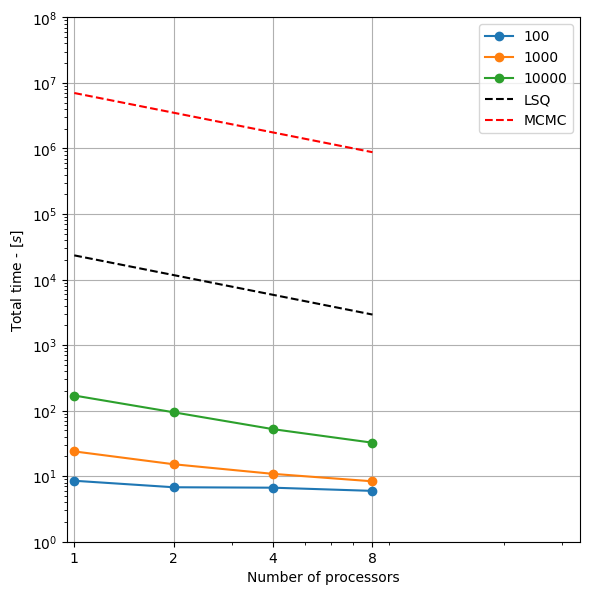

In [4]:
print("\n# Generating Timing Plots")
print("="*50)

# Generate comprehensive timing plots
ig.timing_plot(f_timing=timing_file)

print(f"Timing plots generated with prefix: {timing_file.split('.')[0]}")
print("Generated plots include:")
print("- Total execution time analysis")
print("- Forward modeling performance and speedup")
print("- Rejection sampling scaling analysis") 
print("- Posterior statistics performance")
print("- Cumulative time breakdowns")

## Medium Scale Timing Test

This example shows how to run a more comprehensive timing test with larger datasets.
Uncomment the code below to run a medium-scale test (takes longer to complete).

In [5]:
# Uncomment the block below for medium-scale timing test
"""
print("\n# Running Medium Scale Timing Test")
print("="*50)

# Define medium-scale test parameters  
N_arr_medium = [100, 500, 1000, 5000, 10000]  # Medium dataset sizes
Nproc_arr_medium = [1, 2, 4, 8]               # More processor counts

# Run timing computation
timing_file_medium = ig.timing_compute(N_arr=N_arr_medium, Nproc_arr=Nproc_arr_medium)

print(f"Medium-scale timing results saved to: {timing_file_medium}")

# Generate plots
ig.timing_plot(f_timing=timing_file_medium)
print(f"Medium-scale timing plots generated with prefix: {timing_file_medium.split('.')[0]}")
"""

'\nprint("\n# Running Medium Scale Timing Test")\nprint("="*50)\n\n# Define medium-scale test parameters  \nN_arr_medium = [100, 500, 1000, 5000, 10000]  # Medium dataset sizes\nNproc_arr_medium = [1, 2, 4, 8]               # More processor counts\n\n# Run timing computation\ntiming_file_medium = ig.timing_compute(N_arr=N_arr_medium, Nproc_arr=Nproc_arr_medium)\n\nprint(f"Medium-scale timing results saved to: {timing_file_medium}")\n\n# Generate plots\nig.timing_plot(f_timing=timing_file_medium)\nprint(f"Medium-scale timing plots generated with prefix: {timing_file_medium.split(\'.\')[0]}")\n'

## Full Scale Timing Test  

For production timing analysis, you can run the full test with the default parameters.
This will test a wide range of dataset sizes and all available processor counts.

In [6]:
# Uncomment the block below for full-scale timing test (takes significant time)
"""
print("\n# Running Full Scale Timing Test")
print("="*50)

# Run with default parameters (comprehensive test)
timing_file_full = ig.timing_compute()  # Uses default N_arr and Nproc_arr

print(f"Full-scale timing results saved to: {timing_file_full}")

# Generate comprehensive plots
ig.timing_plot(f_timing=timing_file_full)
print(f"Full-scale timing plots generated with prefix: {timing_file_full.split('.')[0]}")
"""

'\nprint("\n# Running Full Scale Timing Test")\nprint("="*50)\n\n# Run with default parameters (comprehensive test)\ntiming_file_full = ig.timing_compute()  # Uses default N_arr and Nproc_arr\n\nprint(f"Full-scale timing results saved to: {timing_file_full}")\n\n# Generate comprehensive plots\nig.timing_plot(f_timing=timing_file_full)\nprint(f"Full-scale timing plots generated with prefix: {timing_file_full.split(\'.\')[0]}")\n'

## Custom Timing Configuration

You can also customize the timing test for specific scenarios

In [7]:
print("\n# Example: Custom Timing Configuration")
print("="*50)

# Example: Focus on specific dataset sizes of interest
N_arr_custom = [1000, 5000, 10000]  # Focus on medium-large datasets
Nproc_arr_custom = [1, 4, 8]        # Test specific processor counts

print(f"Custom test configuration:")
print(f"Dataset sizes: {N_arr_custom}")  
print(f"Processor counts: {Nproc_arr_custom}")
print(f"This configuration tests {len(N_arr_custom)} × {len(Nproc_arr_custom)} = {len(N_arr_custom) * len(Nproc_arr_custom)} combinations")

# Uncomment to run custom timing test
"""
timing_file_custom = ig.timing_compute(N_arr=N_arr_custom, Nproc_arr=Nproc_arr_custom)
ig.timing_plot(f_timing=timing_file_custom)
print(f"Custom timing analysis complete: {timing_file_custom}")
"""


# Example: Custom Timing Configuration
Custom test configuration:
Dataset sizes: [1000, 5000, 10000]
Processor counts: [1, 4, 8]
This configuration tests 3 × 3 = 9 combinations


'\ntiming_file_custom = ig.timing_compute(N_arr=N_arr_custom, Nproc_arr=Nproc_arr_custom)\nig.timing_plot(f_timing=timing_file_custom)\nprint(f"Custom timing analysis complete: {timing_file_custom}")\n'

## Understanding Timing Results

The timing analysis provides insights into:

### Performance Scaling
- How execution time varies with dataset size
- Parallel efficiency across different processor counts
- Identification of computational bottlenecks

### Component Analysis  
- Relative time spent in each workflow component
- Which components benefit most from parallelization
- Memory vs compute-bound identification

### Comparison Baselines
- Performance relative to traditional least squares methods
- Comparison with MCMC sampling approaches
- Cost-benefit analysis of different configurations

### Optimization Guidance
- Optimal processor counts for different dataset sizes
- Sweet spots for price-performance ratios
- Scaling behavior for production deployments

## Tips for Timing Analysis

1. **Start Small**: Begin with quick tests using small N_arr and Nproc_arr
2. **System Warm-up**: First runs may be slower due to system initialization
3. **Resource Monitoring**: Monitor CPU, memory usage during large tests
4. **Reproducibility**: Results may vary between runs due to system load
5. **Hardware Specific**: Results are specific to your hardware configuration
6. **Baseline Comparison**: Compare with known reference systems when possible

print("\n# Timing Analysis Complete")
print("="*50)
print("Check the generated plots for detailed performance analysis.")
print("Timing data is saved in NPZ format for further analysis if needed.")